# World Happiness Report Project

In [554]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [459]:
# creating a DataFrame and loading the dataset
df = pd.read_csv('Happiness_score_dataset.csv')
df

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.34951   
1              7.561         0.04884                   1.30232  1.40223   
2              7.527         0.03328                   1.32548  1.36058   
3              7.522         0.03880                   1.45900  1.33095   
4              7.427         0.03553                   1.32629  1.32261   
..               ...             ...                       ...      ...   
153            3.465         0.03464                   0.22208  0.77370   
154            3.340         0.03656                   0.28665  0.35386   
155            3.006         0.05015                   0.66320  0.47489   
156            2.905         0.08658                   0.01530  0.41587   
157            2.839         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  
0       0.29678            2.51738  
1       0.43630            2.70201  
2       0.34139            2.49204  
3       0.34699            2.46531  
4       0.45811            2.45176  
..          ...                ...  
153     0.22628            0.67042  
154     0.18260            1.63328  
155     0.47179            0.32858  
156     0.19727            1.83302  
157     0.16681            1.56726  

[158 rows x 12 columns]

In [460]:
# Changing the indexing of our target col ie Happiness score
if 'Happiness Score' in df.columns:
    Happiness_score = df.pop('Happiness Score')
    df['Happiness Score'] = Happiness_score
else:
    print("Col 'Happiness Score' does not exist in df")

In [461]:
df

Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Standard Error  Economy (GDP per Capita)   Family  \
0           0.03411                   1.39651  1.34951   
1           0.04884                   1.30232  1.40223   
2           0.03328                   1.32548  1.36058   
3           0.03880                   1.45900  1.33095   
4           0.03553                   1.32629  1.32261   
..              ...                       ...      ...   
153         0.03464                   0.22208  0.77370   
154         0.03656                   0.28665  0.35386   
155         0.05015                   0.66320  0.47489   
156         0.08658                   0.01530  0.41587   
157         0.06727                   0.20868  0.13995   

     Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                     0.94143  0.66557                        0.41978   
1                     0.94784  0.62877                        0.14145   
2                     0.87464  0.64938                        0.48357   
3                     0.88521  0.66973                        0.36503   
4                     0.90563  0.63297                        0.32957   
..                        ...      ...                            ...   
153                   0.42864  0.59201                        0.55191   
154                   0.31910  0.48450                        0.08010   
155                   0.72193  0.15684                        0.18906   
156                   0.22396  0.11850                        0.10062   
157                   0.28443  0.36453                        0.10731   

     Generosity  Dystopia Residual  Happiness Score  
0       0.29678            2.51738            7.587  
1       0.43630            2.70201            7.561  
2       0.34139            2.49204            7.527  
3       0.34699            2.46531            7.522  
4       0.45811            2.45176            7.427  
..          ...                ...              ...  
153     0.22628            0.67042            3.465  
154     0.18260            1.63328            3.340  
155     0.47179            0.32858            3.006  
156     0.19727            1.83302            2.905  
157     0.16681            1.56726            2.839  

[158 rows x 12 columns]

In [462]:
df.shape

(158, 12)

In [463]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Score'],
      dtype='object')

In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
 11  Happiness Score                158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [465]:
# checking the null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Happiness Score                  0
dtype: int64

<Axes: >

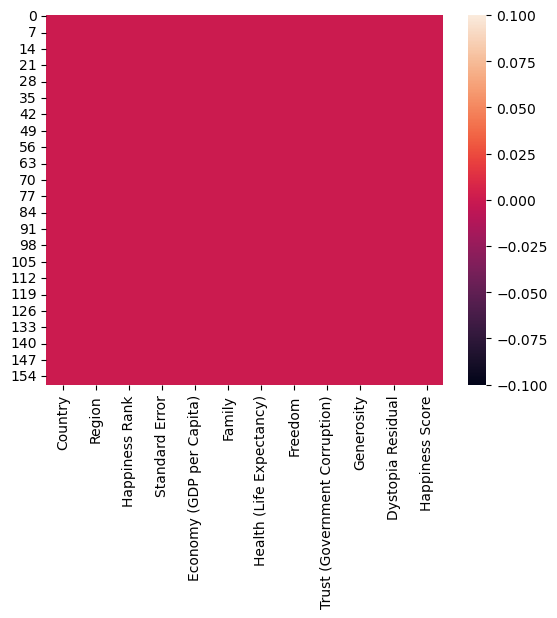

In [466]:
# plotting a heatmap of null values present
sns.heatmap(df.isnull())

In [467]:
# lets check whether any blank space is present or any other values present by using the unique() method
for i in df.columns:
    print(df[i].unique())

['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'
 'Philip

In [468]:
# checking the stats by using describe() method
df.describe()

Happiness Rank  Standard Error  Economy (GDP per Capita)      Family  \
count      158.000000      158.000000                158.000000  158.000000   
mean        79.493671        0.047885                  0.846137    0.991046   
std         45.754363        0.017146                  0.403121    0.272369   
min          1.000000        0.018480                  0.000000    0.000000   
25%         40.250000        0.037268                  0.545808    0.856823   
50%         79.500000        0.043940                  0.910245    1.029510   
75%        118.750000        0.052300                  1.158448    1.214405   
max        158.000000        0.136930                  1.690420    1.402230   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                158.000000  158.000000                     158.000000   
mean                   0.630259    0.428615                       0.143422   
std                    0.247078    0.150693                       0.120034   
min                    0.000000    0.000000                       0.000000   
25%                    0.439185    0.328330                       0.061675   
50%                    0.696705    0.435515                       0.107220   
75%                    0.811013    0.549092                       0.180255   
max                    1.025250    0.669730                       0.551910   

       Generosity  Dystopia Residual  Happiness Score  
count  158.000000         158.000000       158.000000  
mean     0.237296           2.098977         5.375734  
std      0.126685           0.553550         1.145010  
min      0.000000           0.328580         2.839000  
25%      0.150553           1.759410         4.526000  
50%      0.216130           2.095415         5.232500  
75%      0.309883           2.462415         6.243750  
max      0.795880           3.602140         7.587000

In [469]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Happiness Score'],
      dtype='object')

In [470]:
# converting the categorical col ie 'Region' into numeric col
df['Region_numeric'] = df['Region'].replace({'Western Europe': 1, 'North America': 2, 'Australia and New Zealand': 3, 'Middle East and Northern Africa': 4, 'Latin America and Caribbean':5, 'Southeastern Asia': 6, 'Central and Eastern Europe': 7, 'Eastern Asia': 8, 'Sub-Saharan Africa': 9, 'Southern Asia': 10})
df['Region_numeric'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 158 entries, 0 to 157
Series name: Region_numeric
Non-Null Count  Dtype
--------------  -----
158 non-null    int64
dtypes: int64(1)
memory usage: 1.4 KB


In [471]:
# dropping the col 'Country' as it won't help in model building and dropping the 'Region' col since we have conveerted it into a numeric col
df.drop('Country', axis = 1, inplace = True)
df.drop('Region', axis = 1, inplace = True)

<Axes: >

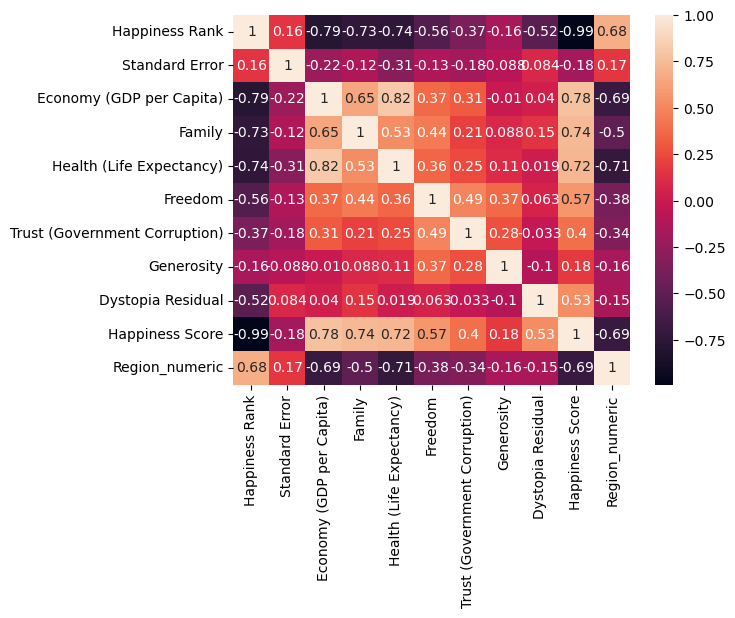

In [472]:
# checking the correlation using heatmap
sns.heatmap(df.corr(),annot = True)

In [473]:
# # dropping the 'Economy' col because it is creating multicolinearity in dataset
# df.drop('Economy (GDP per Capita)', axis = 1, inplace = True)

<Axes: >

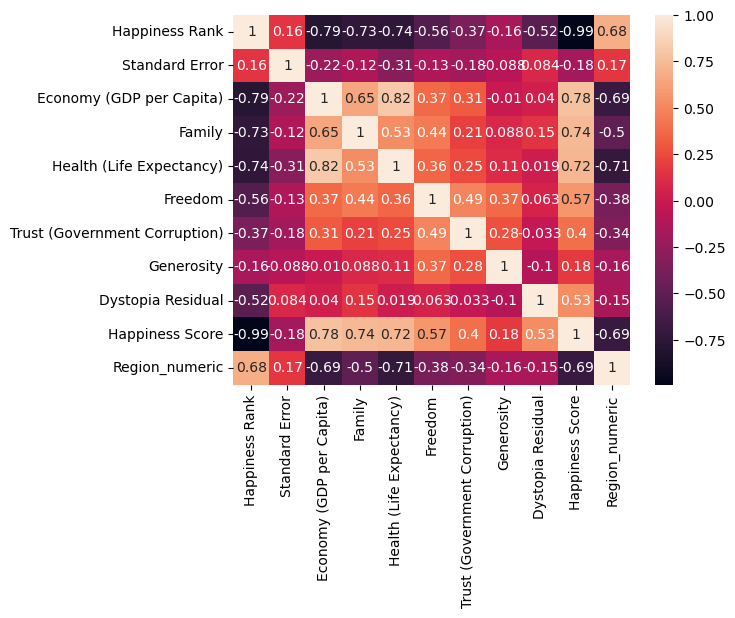

In [474]:
# Rechecking the correlation using heatmap
sns.heatmap(df.corr(),annot = True)

In [475]:
# calculating the 'Region_Health' col by taking boths average
df['Region_Health'] = (df['Region_numeric'] + df['Health (Life Expectancy)']) / 2

In [476]:
# now dropping both cols 'Region_numeric' and 'Health (Life Expectancy)'
df.drop('Region_numeric', axis = 1, inplace = True)
df.drop('Health (Life Expectancy)', axis = 1, inplace = True)

<Axes: >

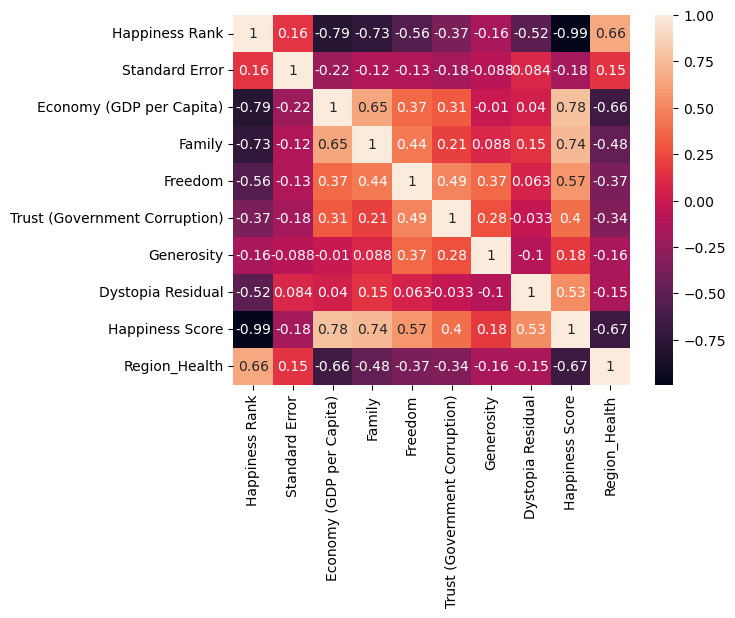

In [477]:
# Rechecking the correlation using heatmap
sns.heatmap(df.corr(),annot = True)

In [478]:
# let's check the skewness present in dataset using skew() method
print('Happiness Rank: ',df['Happiness Rank'].skew())
print('Standard Error: ',df['Standard Error'].skew())
print('Family: ',df['Family'].skew())
print('Region_Health: ',df['Region_Health'].skew())
print('Freedom: ',df['Freedom'].skew())
print('Trust (Government Corruption): ',df['Trust (Government Corruption)'].skew())
print('Generosity: ',df['Generosity'].skew())
print('Dystopia Residual: ',df['Dystopia Residual'].skew())

Happiness Rank:  0.00041846932380538553
Standard Error:  1.9834393956708816
Family:  -1.0068931265421133
Region_Health:  -0.5154535308187652
Freedom:  -0.41346197289710274
Trust (Government Corruption):  1.3854625954673152
Generosity:  1.001960575563042
Dystopia Residual:  -0.23891080938012677


<Axes: ylabel='Frequency'>

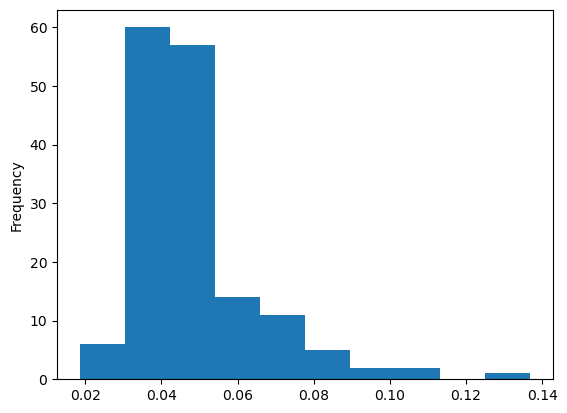

In [479]:
# lets check the distributions of these cols which have skewness
df['Standard Error'].plot.hist()

<Axes: ylabel='Frequency'>

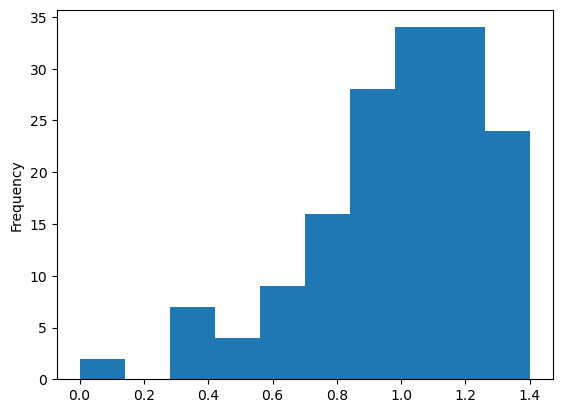

In [480]:
# checking for 'Family' col
df['Family'].plot.hist()

<Axes: ylabel='Frequency'>

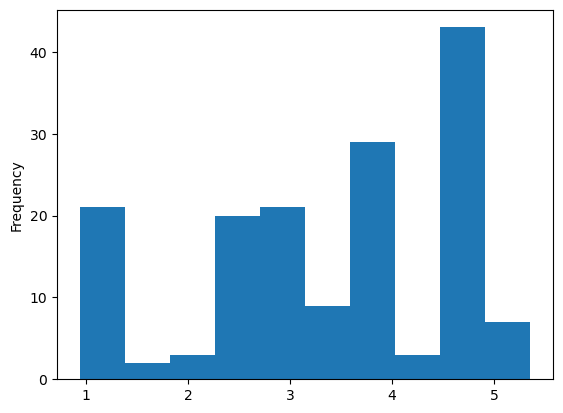

In [481]:
# checking for 'Health (Life Expectancy)' col
df['Region_Health'].plot.hist()

<Axes: ylabel='Frequency'>

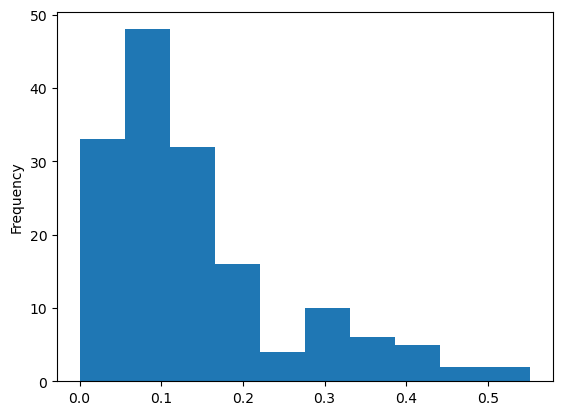

In [482]:
# checking for 'Trust (Government Corruption)' col
df['Trust (Government Corruption)'].plot.hist()

In [483]:
# creating the list of numeric cols
numerical_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'float64' or df.dtypes[i] == 'int64':
        numerical_col.append(i)
print('Numerical Column: ', numerical_col)
print(len(numerical_col))

Numerical Column:  ['Happiness Rank', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Happiness Score', 'Region_Health']
10


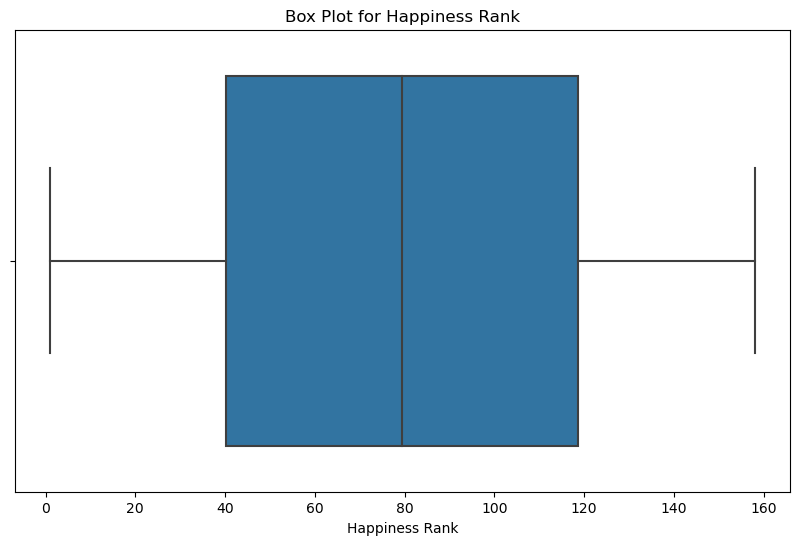

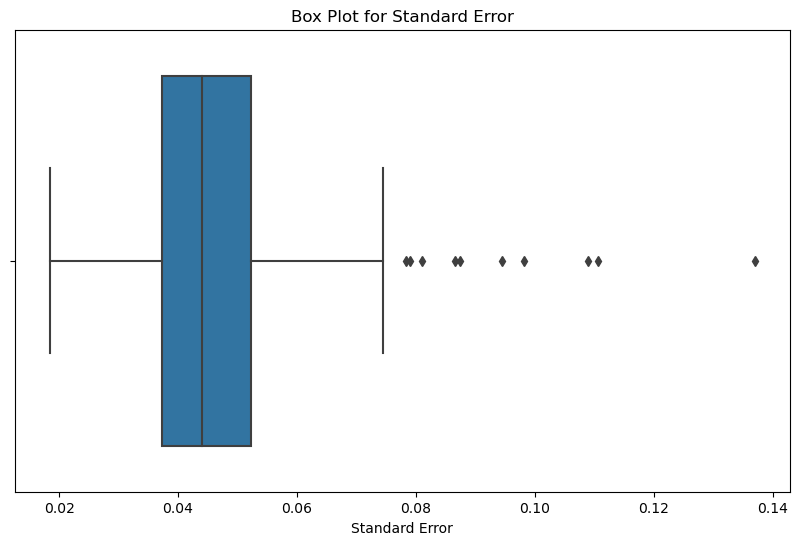

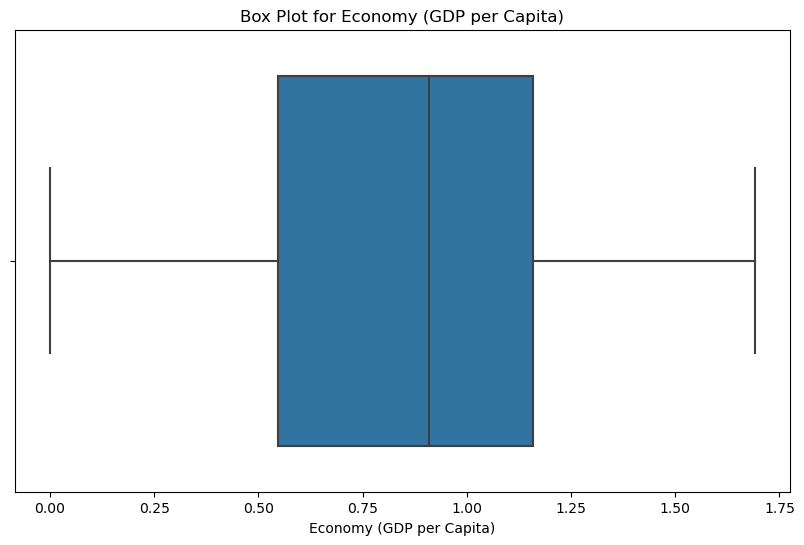

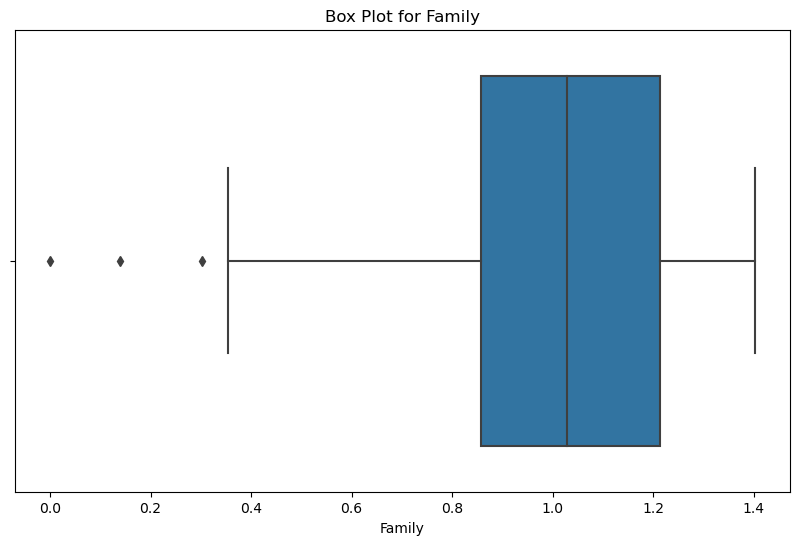

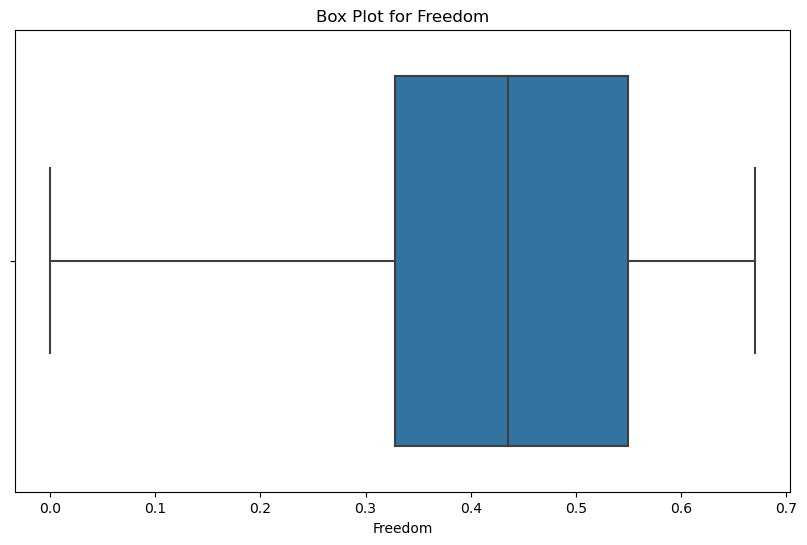

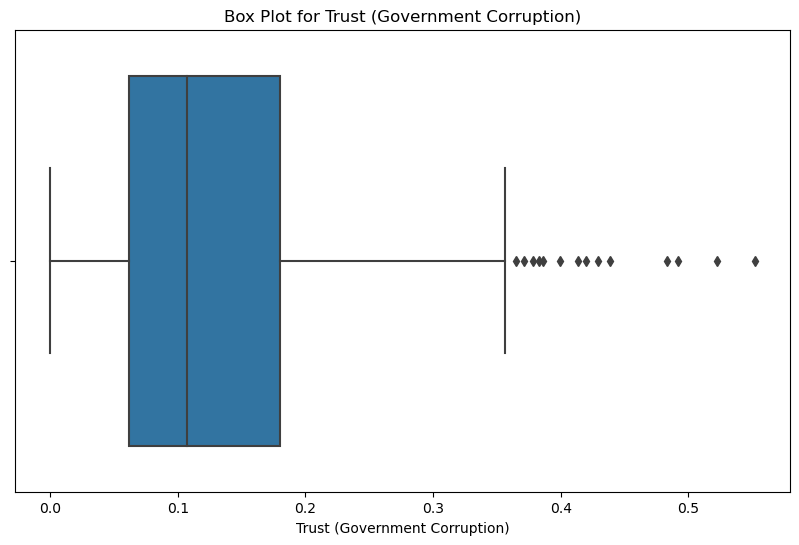

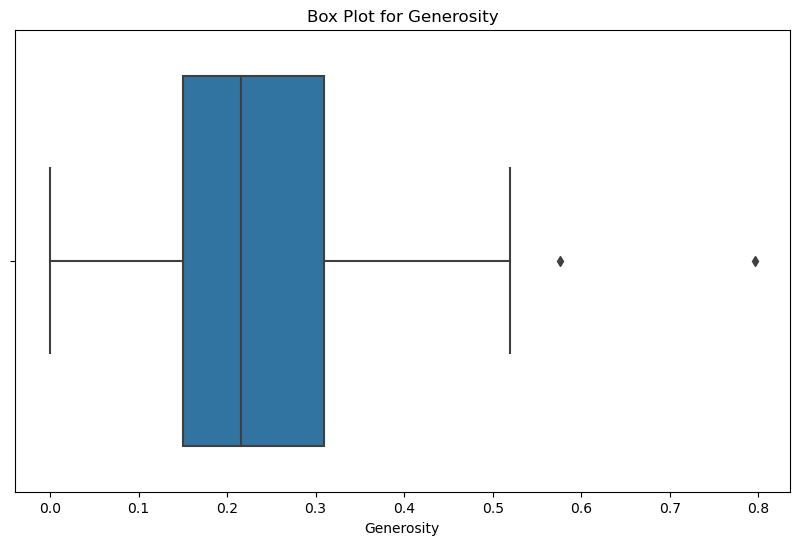

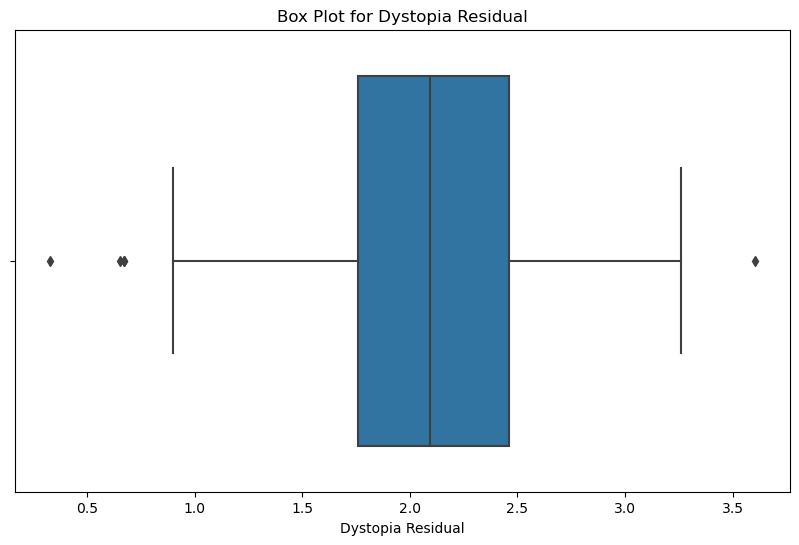

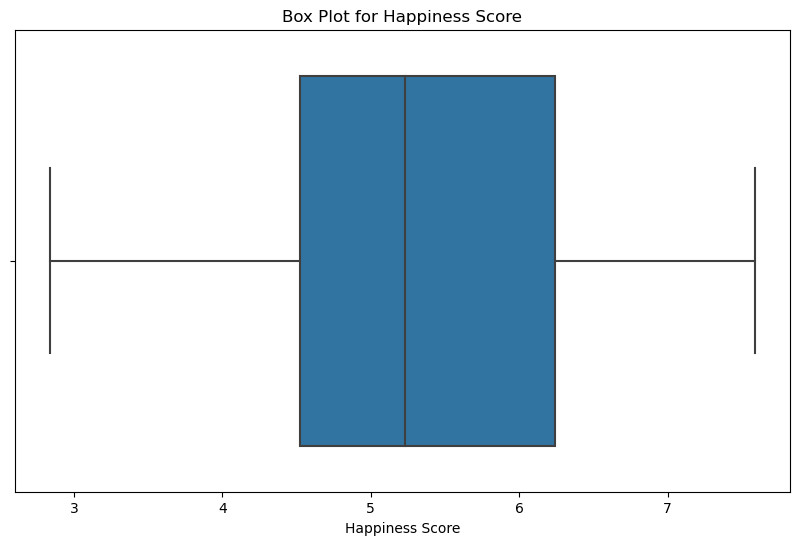

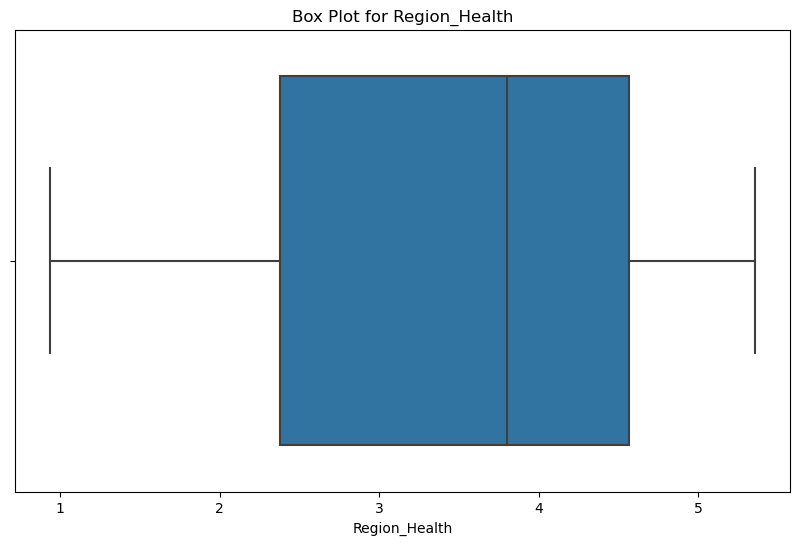

In [484]:
# Checking outliers in all the cols by plotting the box plot

for feature in numerical_col:
    plt.figure(figsize = (10, 6))
    sns.boxplot(x = df[feature])
    plt.title(f'Box Plot for {feature}')
    plt.show()

## Removing and Capping the outliers using the IQR (Interquartile) method

### 1) For 'Standard Error' col

In [485]:
# finding the 25th and 75th percentile 
stand_percentile25 = df['Standard Error'].quantile(.25)
stand_percentile75 = df['Standard Error'].quantile(.75)
print(stand_percentile25)
print(stand_percentile75)

0.0372675
0.0523


In [486]:
# finding the IQR
stand_iqr = stand_percentile75 -  stand_percentile25
print(stand_iqr)

0.015032499999999997


In [487]:
# finding the upper and lower limit
stand_upper = stand_percentile75 + 1.5 * stand_iqr
stand_lower = stand_percentile25 - 1.5 * stand_iqr
print(stand_upper)
print(stand_lower)

0.07484874999999999
0.014718750000000006


### Capping

In [488]:
# Capping the 'Standard Error' col
df['Standard Error'] = np.where(
    df['Standard Error'] > stand_upper, stand_upper,
    np.where(
        df['Standard Error'] < stand_lower, stand_lower,
        df['Standard Error']
    )
)

<Axes: >

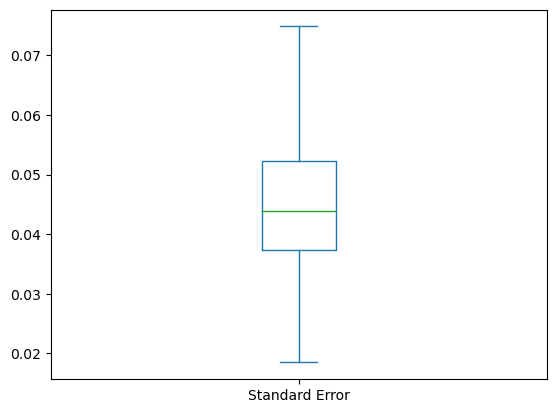

In [489]:
# Rechecking the outliers still present or not
df['Standard Error'].plot.box()

### 2) For 'Family' col

In [490]:
# finding 25th and 75th percentile 
family_percentile25 = df['Family'].quantile(.25)
family_percentile75 = df['Family'].quantile(.75)
print(family_percentile25)
print(family_percentile75)

0.8568225
1.214405


In [491]:
# finding the IQR
family_iqr = family_percentile75 - family_percentile25
family_iqr

0.3575824999999999

In [492]:
# finding the upper and lower limit
family_upper = family_percentile75 + 1.5 * family_iqr
family_lower = family_percentile25 - 1.5 * family_iqr
print(family_upper)
print(family_lower)

1.7507787499999998
0.32044875000000017


### Capping 

In [493]:
# Capping the 'Family' col
df['Family'] = np.where(
    df['Family'] > family_upper, family_upper,
    np.where(
        df['Family'] < family_lower, family_lower,
        df['Family']
    )                    
)

<Axes: >

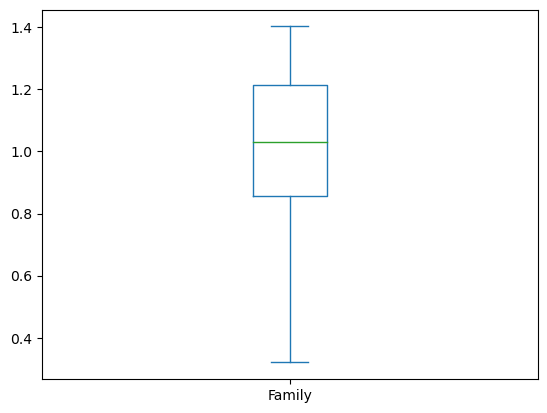

In [494]:
# Rechecking the outliers still present or not
df['Family'].plot.box()

### 3) For 'Trust (Government Corruption)' col

In [495]:
# finding 25th and 75th percentile
trust_percentile25 = df['Trust (Government Corruption)'].quantile(.25)
trust_percentile75 = df['Trust (Government Corruption)'].quantile(.75)
print(trust_percentile25)
print(trust_percentile75)

0.061675
0.180255


In [496]:
# finding the IQR
trust_iqr = trust_percentile75 - trust_percentile25
trust_iqr

0.11857999999999999

In [497]:
# finding the upper and lower limit
trust_upper = trust_percentile75 + 1.5 * trust_iqr
trust_lower = trust_percentile25 - 1.5 * trust_iqr
print(trust_upper)
print(trust_lower)

0.35812499999999997
-0.11619499999999996


### Capping

In [498]:
# Capping the 'Trust (Government Corruption)' col
df['Trust (Government Corruption)'] = np.where(
    df['Trust (Government Corruption)'] > trust_upper, trust_upper,
    np.where(
        df['Trust (Government Corruption)'] < trust_lower, trust_lower,
        df['Trust (Government Corruption)']
    )
)

<Axes: >

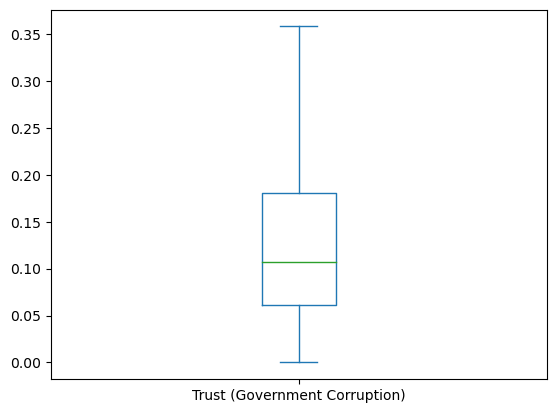

In [499]:
# Rechecking the outliers are still present or not
df['Trust (Government Corruption)'].plot.box()

### 4) For 'Generosity' col

In [500]:
# finding the 25th and 75th percentile
generosity_percentile25 = df['Generosity'].quantile(.25)
generosity_percentile75 = df['Generosity'].quantile(.75)
print(generosity_percentile25)
print(generosity_percentile75)

0.1505525
0.3098825


In [501]:
# finding the IQR
gen_iqr = generosity_percentile75 - generosity_percentile25
gen_iqr

0.15933

In [502]:
# finding the upper and lower limit
gen_upper = generosity_percentile75 + 1.5 * gen_iqr
gen_lower = generosity_percentile25 - 1.5 * gen_iqr
print(gen_upper)
print(gen_lower)

0.5488775
-0.08844250000000001


### Capping 

In [503]:
# Capping the 'Generosity' col
df['Generosity'] = np.where(
    df['Generosity'] > gen_upper, gen_upper,
    np.where(
        df['Generosity'] < gen_lower, gen_lower,
        df['Generosity']
    )
)

<Axes: >

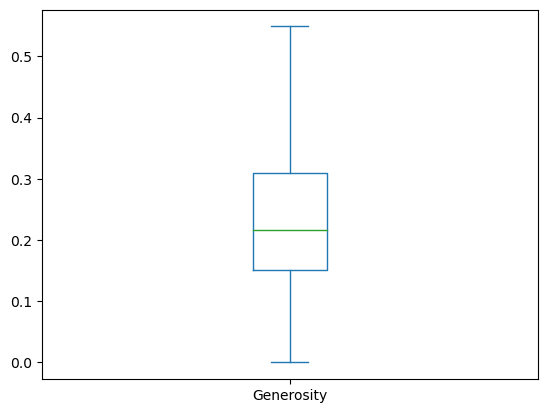

In [504]:
# Rechecking the outliers are still present or not
df['Generosity'].plot.box()

### 5) For 'Dystopia Residual' col

In [505]:
# finding the 25th and 75th percentile
dystopia_percentile25 = df['Dystopia Residual'].quantile(.25)
dystopia_percentile75 = df['Dystopia Residual'].quantile(.75)
print(dystopia_percentile25)
print(dystopia_percentile75)

1.75941
2.462415


In [506]:
# finding the IQR
dystopia_iqr = dystopia_percentile75 - dystopia_percentile25
dystopia_iqr

0.7030050000000001

In [507]:
# finding the upper and lower limit
dystopia_upper = dystopia_percentile75 + 1.5 * dystopia_iqr
dystopia_lower = dystopia_percentile25 - 1.5 * dystopia_iqr
print(dystopia_upper)
print(dystopia_lower)

3.5169225
0.7049024999999998


### Capping

In [508]:
# Capping the 'Dystopia Residual' col
df['Dystopia Residual'] = np.where(
    df['Dystopia Residual'] > dystopia_upper, dystopia_upper,
    np.where(
        df['Dystopia Residual'] < dystopia_lower, dystopia_lower,
        df['Dystopia Residual']
    )
)

<Axes: >

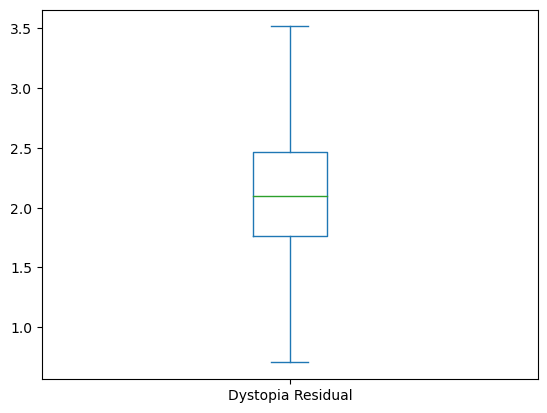

In [509]:
# Rechecking the outliers are still present or now
df['Dystopia Residual'].plot.box()

In [510]:
# Checking the skewness of numerical_col
for col in numerical_col:
    print(f"Skewness of {col}: {df[col].skew()}")

Skewness of Happiness Rank: 0.00041846932380538553
Skewness of Standard Error: 0.6704408217188333
Skewness of Economy (GDP per Capita): -0.3175746523312048
Skewness of Family: -0.8025881969872345
Skewness of Freedom: -0.41346197289710274
Skewness of Trust (Government Corruption): 0.9664498013891482
Skewness of Generosity: 0.6421809339321963
Skewness of Dystopia Residual: -0.14624897925078179
Skewness of Happiness Score: 0.09776909409344678
Skewness of Region_Health: -0.5154535308187652


In [511]:
# applying the np.sqrt method on moderate skewness and np.cbrt on high skewness
df['Standard Error'] = np.sqrt(df['Standard Error'])
df['Trust (Government Corruption)'] = np.sqrt(df['Trust (Government Corruption)'])
df['Generosity'] = np.sqrt(df['Generosity'])

In [512]:
# Rechecking the skewness
for col in numerical_col:
    print(f"Skewness of {col}: {df[col].skew()}")

Skewness of Happiness Rank: 0.00041846932380538553
Skewness of Standard Error: 0.310018232807627
Skewness of Economy (GDP per Capita): -0.3175746523312048
Skewness of Family: -0.8025881969872345
Skewness of Freedom: -0.41346197289710274
Skewness of Trust (Government Corruption): 0.24920628276781387
Skewness of Generosity: -0.28766117725970447
Skewness of Dystopia Residual: -0.14624897925078179
Skewness of Happiness Score: 0.09776909409344678
Skewness of Region_Health: -0.5154535308187652


In [513]:
df

Happiness Rank  Standard Error  Economy (GDP per Capita)    Family  \
0                 1        0.184689                   1.39651  1.349510   
1                 2        0.220998                   1.30232  1.402230   
2                 3        0.182428                   1.32548  1.360580   
3                 4        0.196977                   1.45900  1.330950   
4                 5        0.188494                   1.32629  1.322610   
..              ...             ...                       ...       ...   
153             154        0.186118                   0.22208  0.773700   
154             155        0.191207                   0.28665  0.353860   
155             156        0.223942                   0.66320  0.474890   
156             157        0.273585                   0.01530  0.415870   
157             158        0.259365                   0.20868  0.320449   

     Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual  \
0    0.66557                       0.598435    0.544775           2.517380   
1    0.62877                       0.376098    0.660530           2.702010   
2    0.64938                       0.598435    0.584286           2.492040   
3    0.66973                       0.598435    0.589059           2.465310   
4    0.63297                       0.574082    0.676838           2.451760   
..       ...                            ...         ...                ...   
153  0.59201                       0.598435    0.475689           0.704902   
154  0.48450                       0.283019    0.427317           1.633280   
155  0.15684                       0.434810    0.686870           0.704902   
156  0.11850                       0.317207    0.444151           1.833020   
157  0.36453                       0.327582    0.408424           1.567260   

     Happiness Score  Region_Health  
0              7.587       0.970715  
1              7.561       0.973920  
2              7.527       0.937320  
3              7.522       0.942605  
4              7.427       1.452815  
..               ...            ...  
153            3.465       4.714320  
154            3.340       4.659550  
155            3.006       2.360965  
156            2.905       4.611980  
157            2.839       4.642215  

[158 rows x 10 columns]

## Visualiztion

### Univariate Analysis

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\1551955334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df[feature])


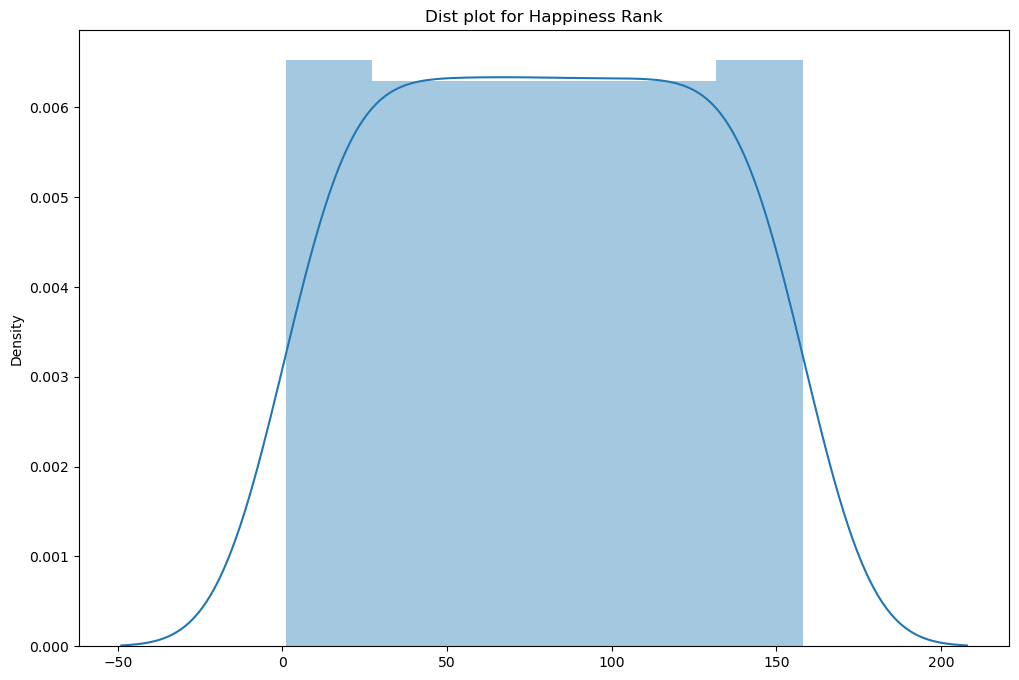

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\1551955334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df[feature])


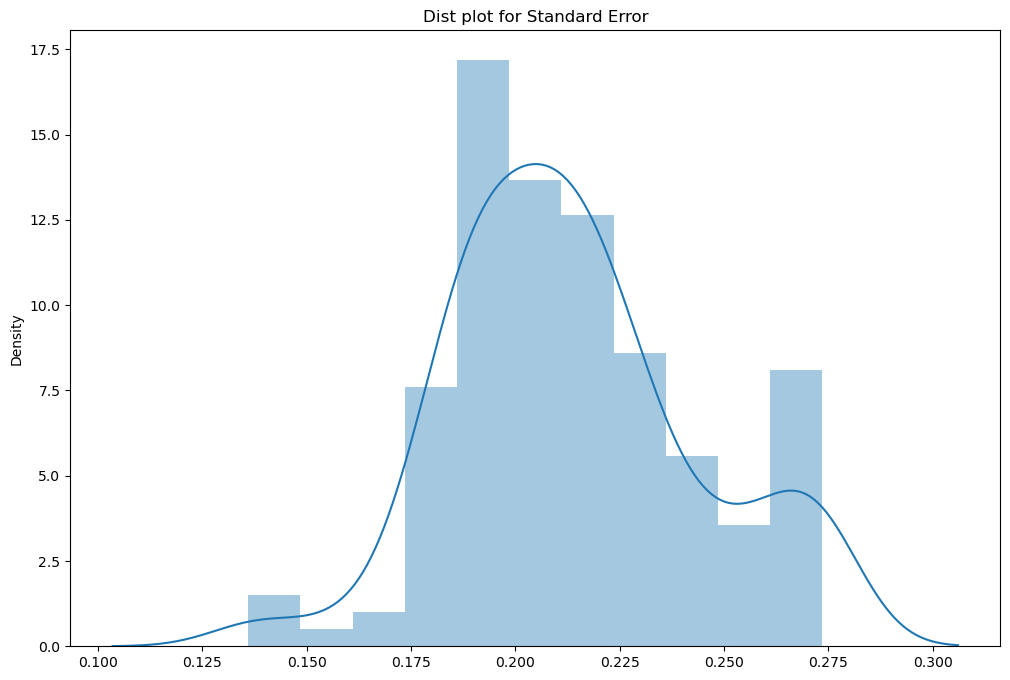

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\1551955334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df[feature])


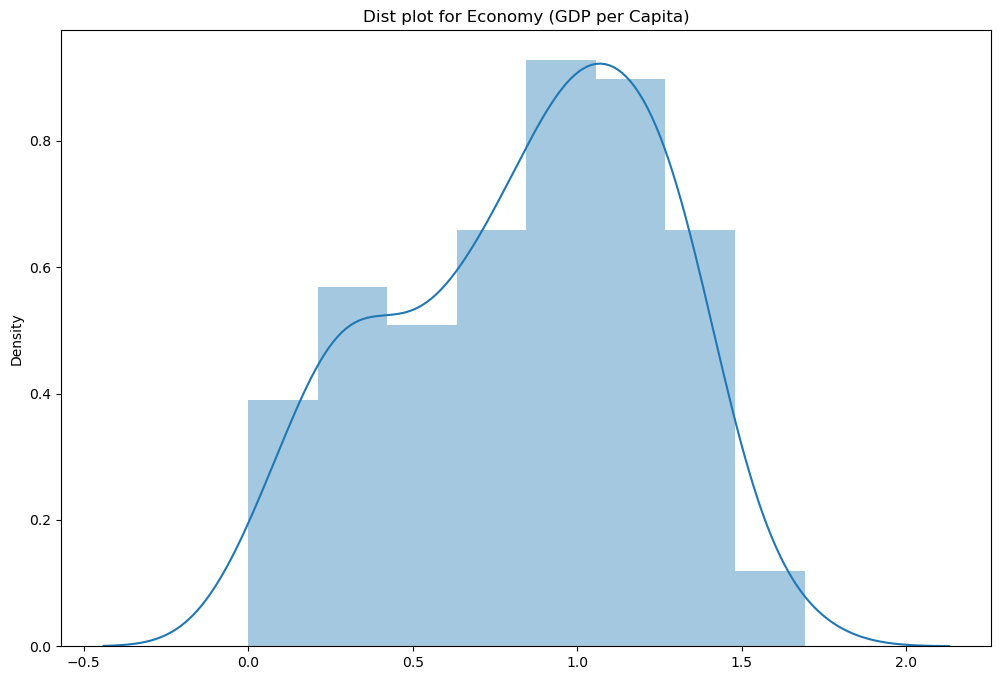

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\1551955334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df[feature])


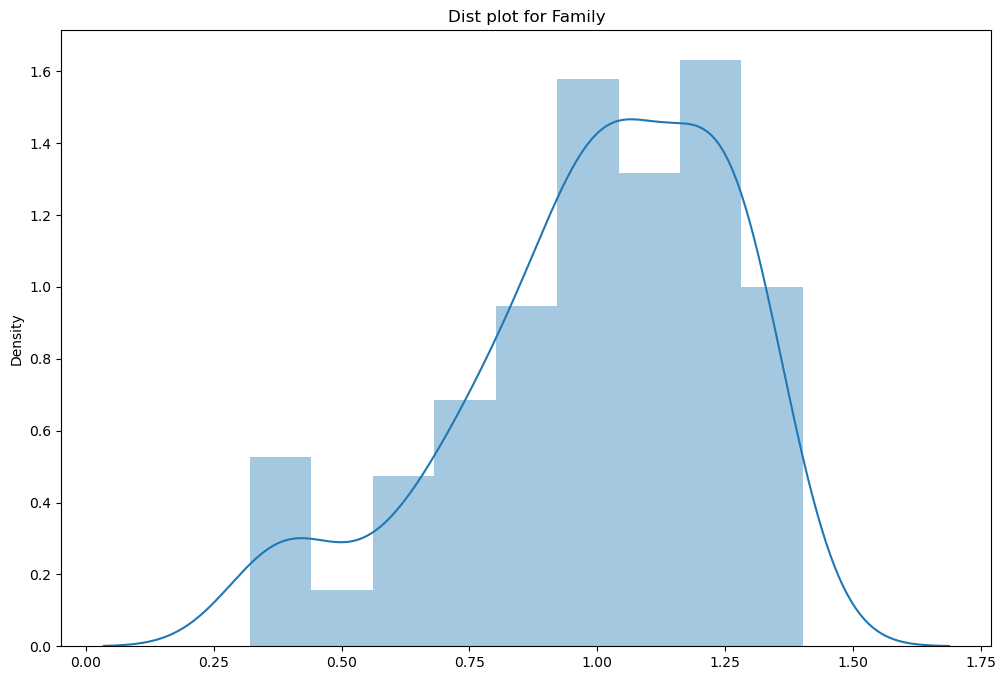

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\1551955334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df[feature])


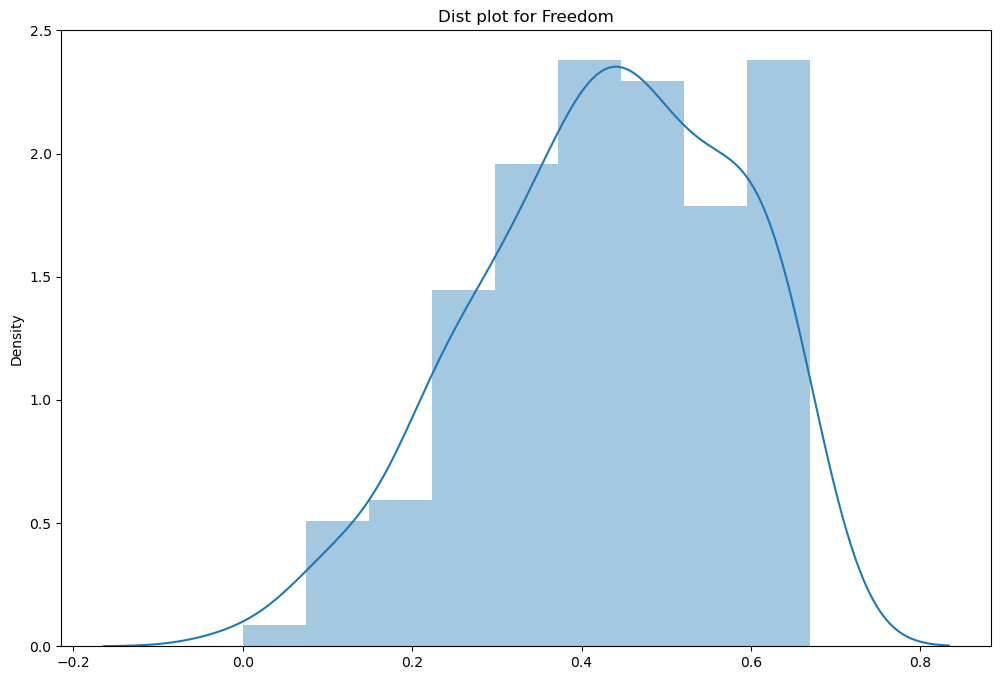

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\1551955334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df[feature])


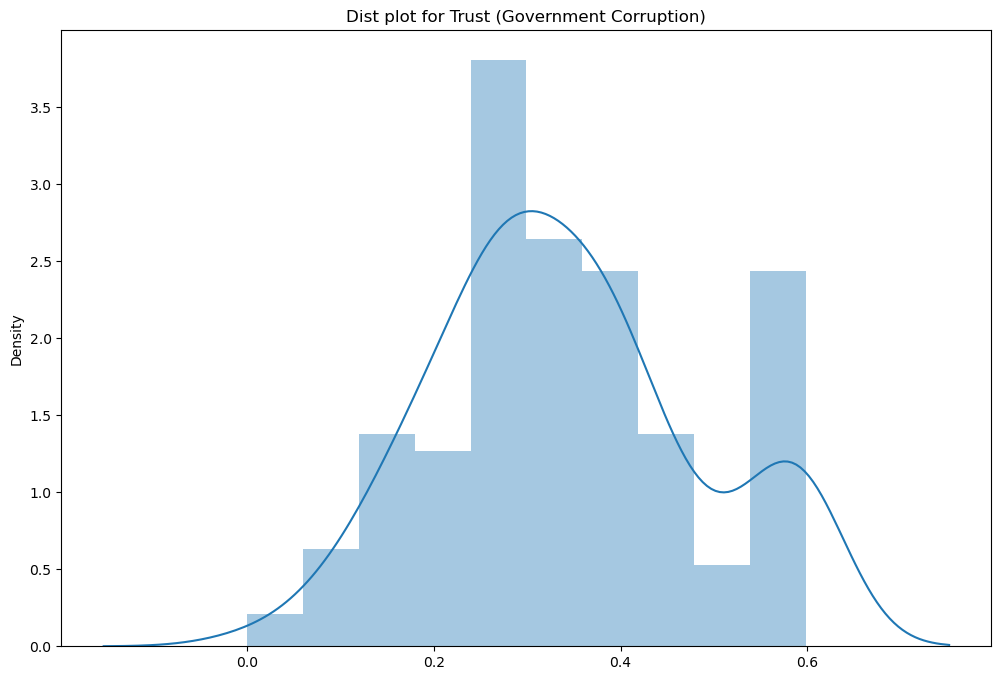

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\1551955334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df[feature])


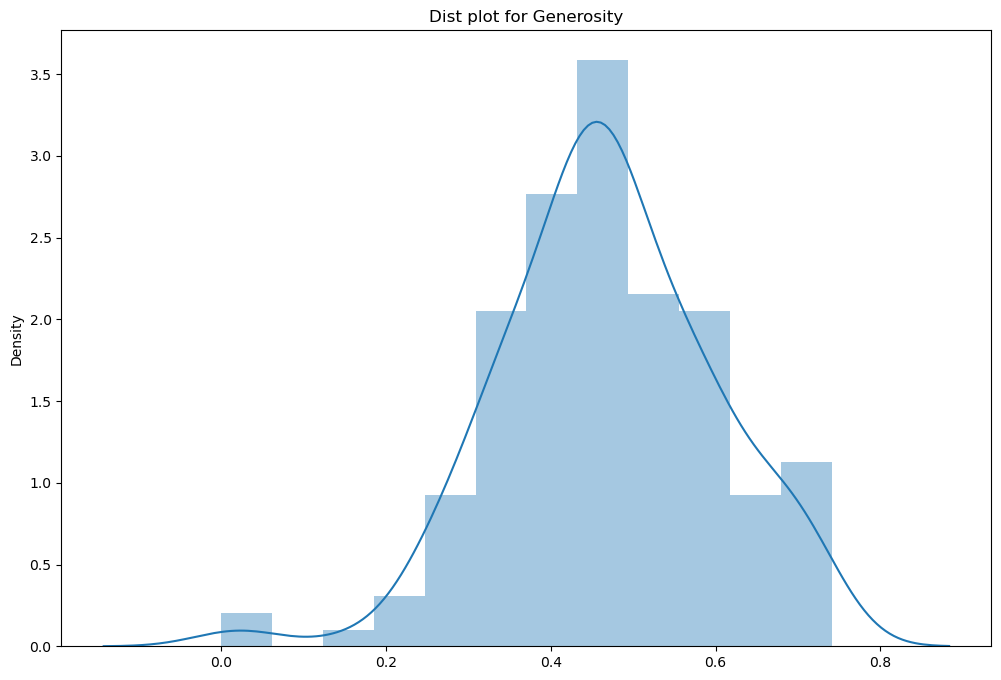

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\1551955334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df[feature])


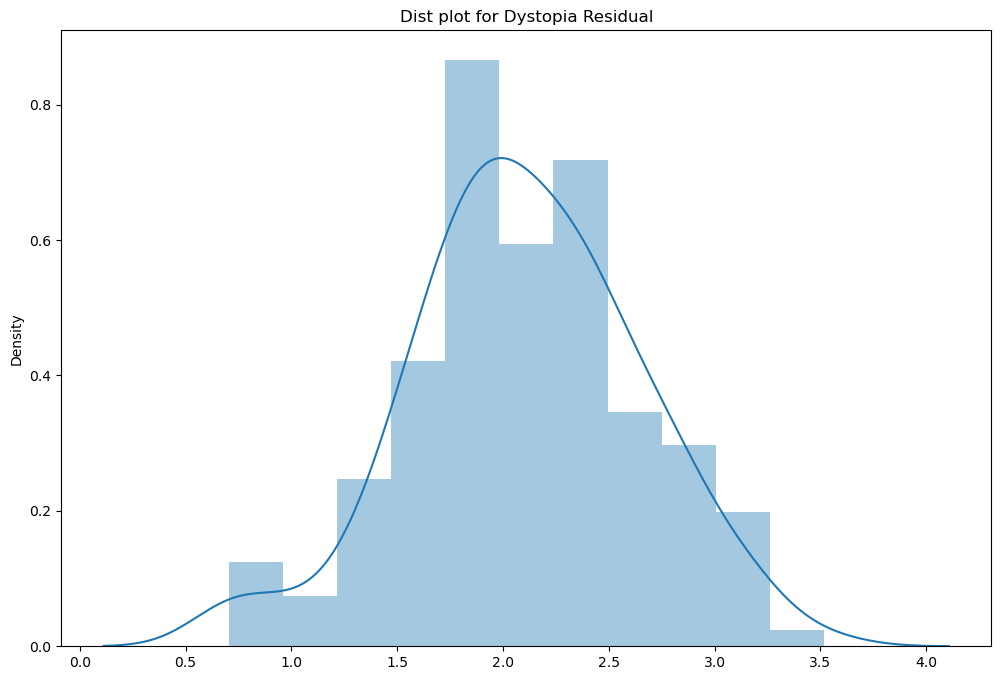

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\1551955334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df[feature])


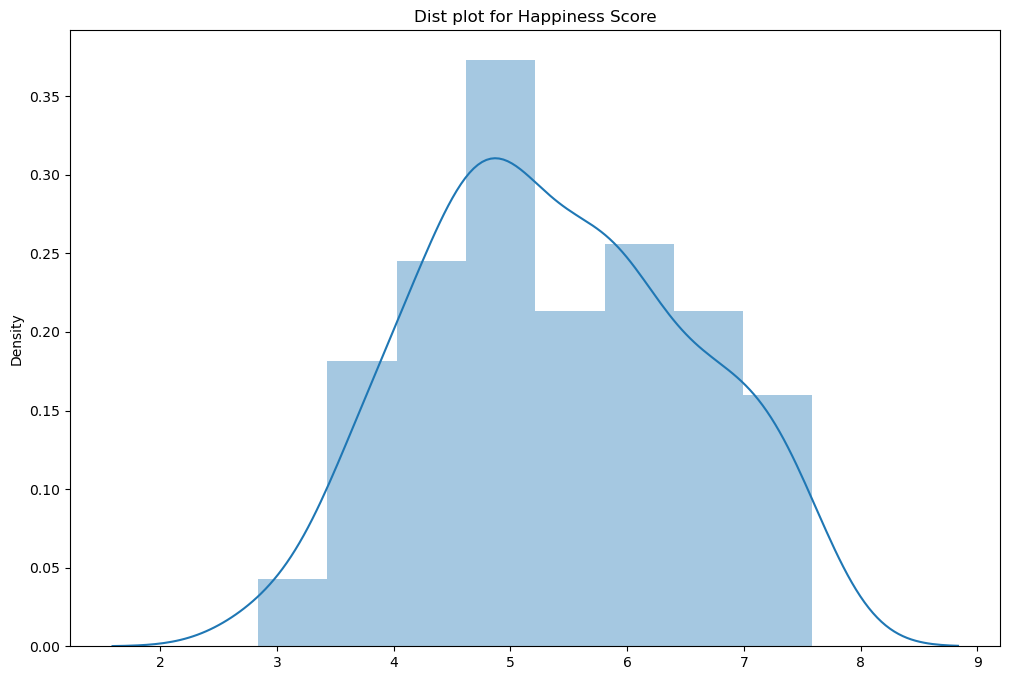

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\1551955334.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df[feature])


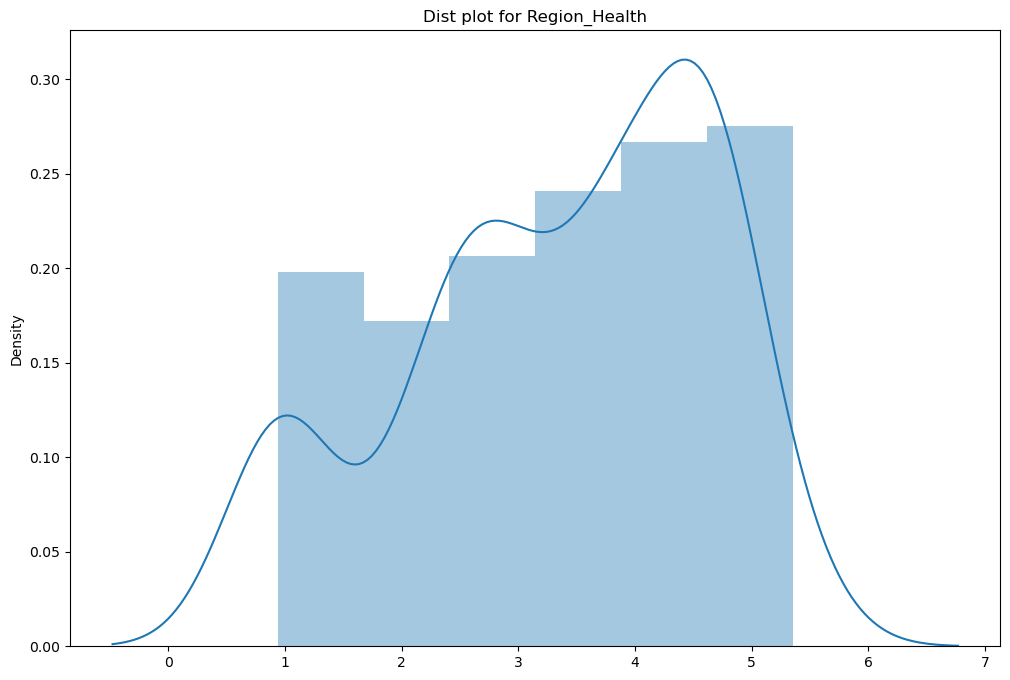

In [514]:
# checking the distribution of all numerical cols
for feature in numerical_col:
    plt.figure(figsize = (12, 8))
    sns.distplot(x = df[feature])
    plt.title(f'Dist plot for {feature}')
    plt.show()

### Bivariate Analysis

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\416813202.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = 'Family', y = 'Standard Error', data = df, palette = 'bright')


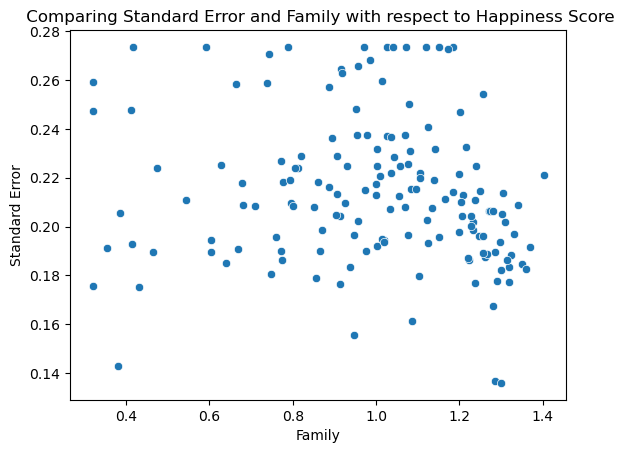

In [515]:
# Comparing Standard Error and Economy (GDP per Capita) with respect to Happiness Score
plt.title(' Comparing Standard Error and Family with respect to Happiness Score')
sns.scatterplot(x = 'Family', y = 'Standard Error', data = df, palette = 'bright')
plt.show()

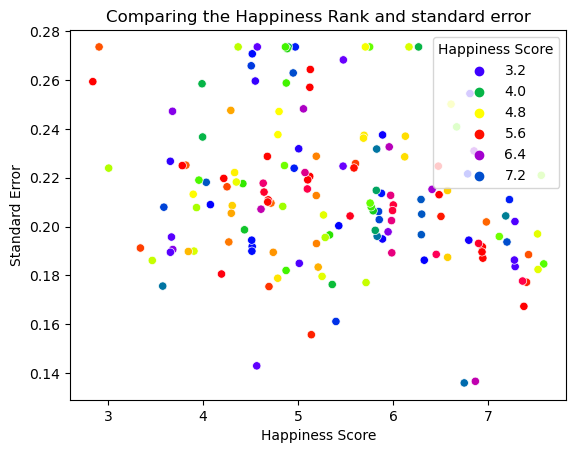

In [516]:
# Comparing the Happiness Rank and standard error
plt.title('Comparing the Happiness Rank and standard error')
sns.scatterplot(x = 'Happiness Score', y = 'Standard Error', hue = 'Happiness Score', data = df, palette = 'prism')
plt.show()

In [517]:
# Checking the correlation between 'Economy (GDP per Capita)' and 'Happiness Rank' cols
corr1 = df[['Happiness Rank','Standard Error']].corr()
corr1

Happiness Rank  Standard Error
Happiness Rank        1.000000        0.211505
Standard Error        0.211505        1.000000

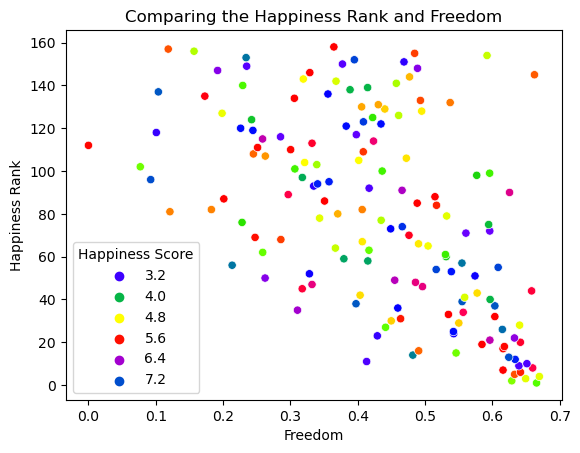

In [518]:
# Comparing the Happiness Rank and Economy (GDP per Capita)
plt.title('Comparing the Happiness Rank and Freedom')
sns.scatterplot(x = 'Freedom', y = 'Happiness Rank', hue = 'Happiness Score', data = df, palette = 'prism')
plt.show()

In [519]:
# Checking the correlation between 'Economy (GDP per Capita)' and 'Happiness Rank' cols
corr2 = df[['Freedom', 'Happiness Rank']].corr()
corr2

Freedom  Happiness Rank
Freedom         1.000000       -0.556886
Happiness Rank -0.556886        1.000000

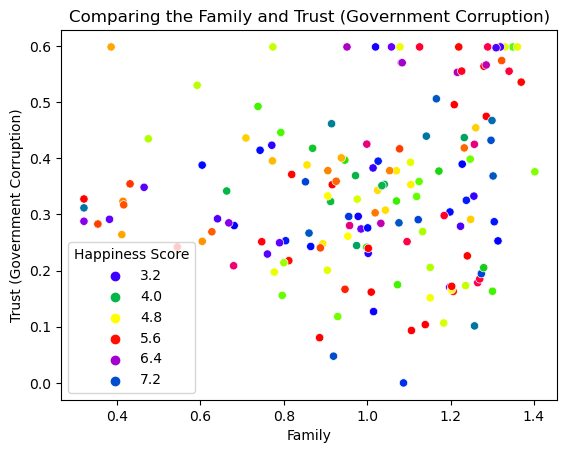

In [520]:
# Comparing the Family and Economy (GDP per Capita)
plt.title('Comparing the Family and Trust (Government Corruption)')
sns.scatterplot(x = 'Family', y = 'Trust (Government Corruption)', hue = 'Happiness Score', data = df, palette = 'prism')
plt.show()

In [521]:
# checking the correlation between both the cols
corr3 = df[['Trust (Government Corruption)','Family']].corr()
corr3

Trust (Government Corruption)    Family
Trust (Government Corruption)                       1.000000  0.158585
Family                                              0.158585  1.000000

In [522]:
numerical_col

['Happiness Rank',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual',
 'Happiness Score',
 'Region_Health']

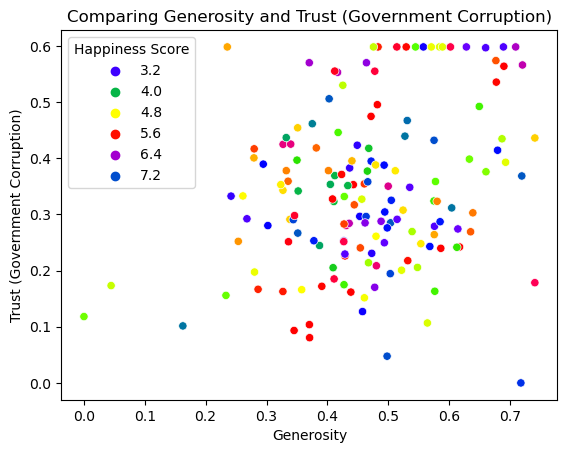

In [523]:
# comparing 'Family' and 'Health (Life Expectancy)' 
plt.title('Comparing Generosity and Trust (Government Corruption)')
sns.scatterplot(x = 'Generosity', y = 'Trust (Government Corruption)', data = df, hue = 'Happiness Score', palette = 'prism')
plt.show()

In [524]:
# checking the correlation
corr6 = df[['Generosity','Trust (Government Corruption)']].corr()
corr6

Generosity  Trust (Government Corruption)
Generosity                       1.000000                       0.275698
Trust (Government Corruption)    0.275698                       1.000000

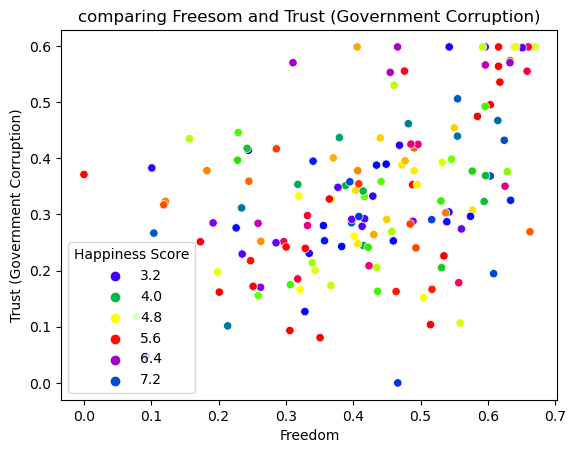

In [525]:
# comparing 'Freedom' and 'Trust (Government Corruption)' 
plt.title('comparing Freesom and Trust (Government Corruption)')
sns.scatterplot(x = 'Freedom', y = 'Trust (Government Corruption)', hue = 'Happiness Score', data = df, palette = 'prism')
plt.show()

In [526]:
# checking the correlation
corr7 = df[['Freedom','Trust (Government Corruption)']].corr()
corr7

Freedom  Trust (Government Corruption)
Freedom                        1.000000                       0.472066
Trust (Government Corruption)  0.472066                       1.000000

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\3347655665.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Economy (GDP per Capita)', data = df, palette = 'prism')


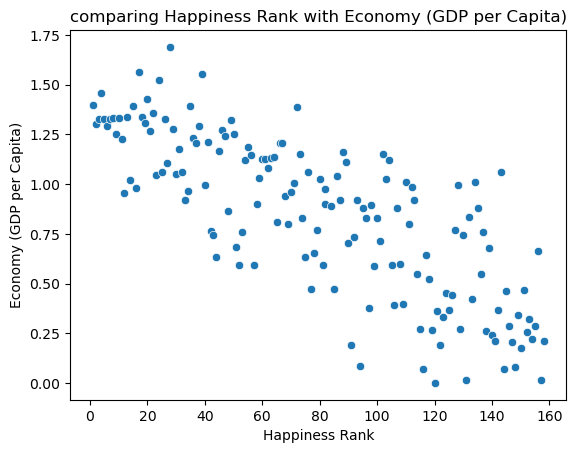

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\3347655665.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Economy (GDP per Capita)', data = df, palette = 'prism')


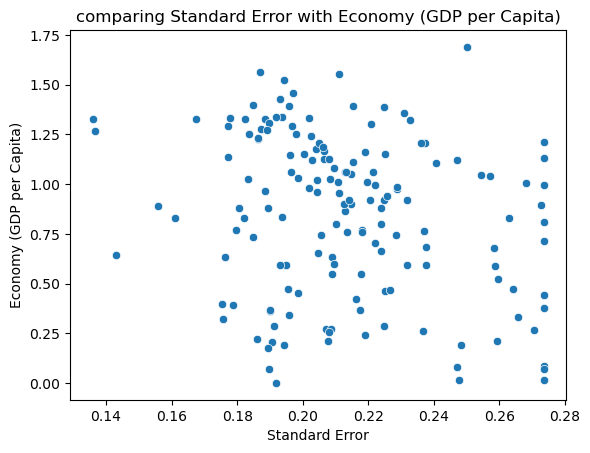

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\3347655665.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Economy (GDP per Capita)', data = df, palette = 'prism')


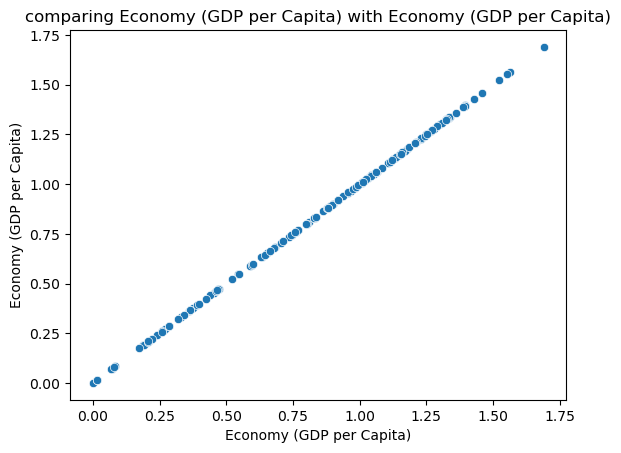

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\3347655665.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Economy (GDP per Capita)', data = df, palette = 'prism')


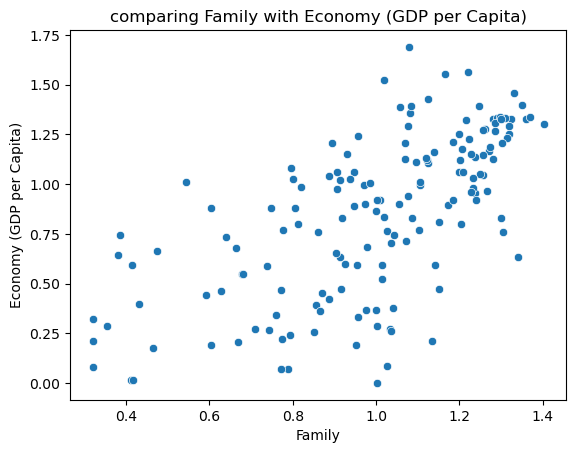

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\3347655665.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Economy (GDP per Capita)', data = df, palette = 'prism')


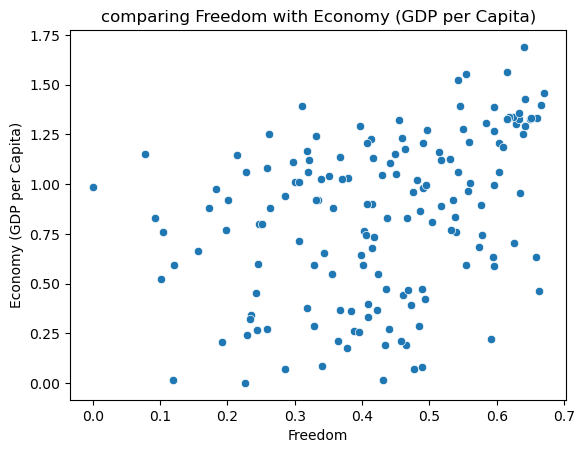

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\3347655665.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Economy (GDP per Capita)', data = df, palette = 'prism')


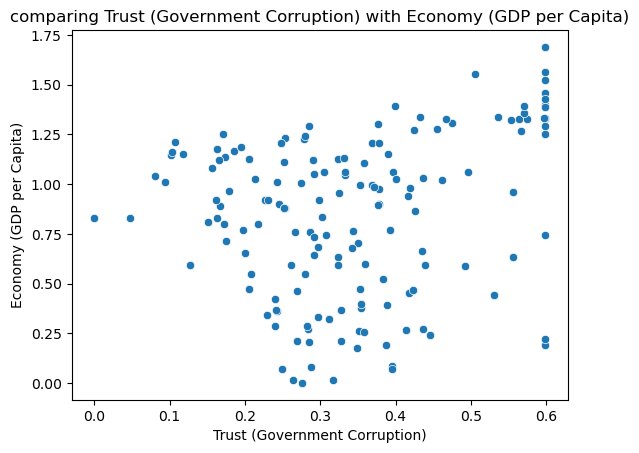

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\3347655665.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Economy (GDP per Capita)', data = df, palette = 'prism')


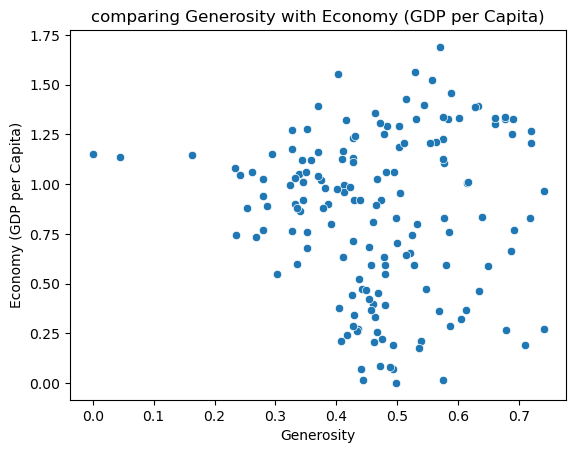

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\3347655665.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Economy (GDP per Capita)', data = df, palette = 'prism')


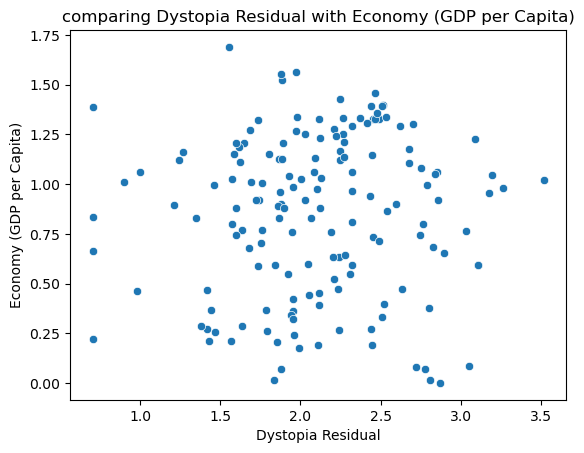

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\3347655665.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Economy (GDP per Capita)', data = df, palette = 'prism')


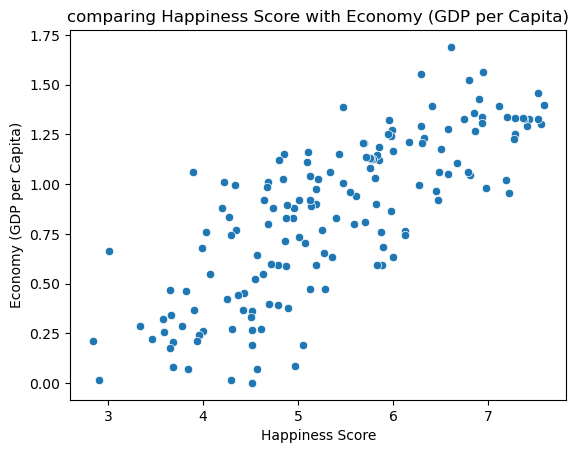

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\3347655665.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Economy (GDP per Capita)', data = df, palette = 'prism')


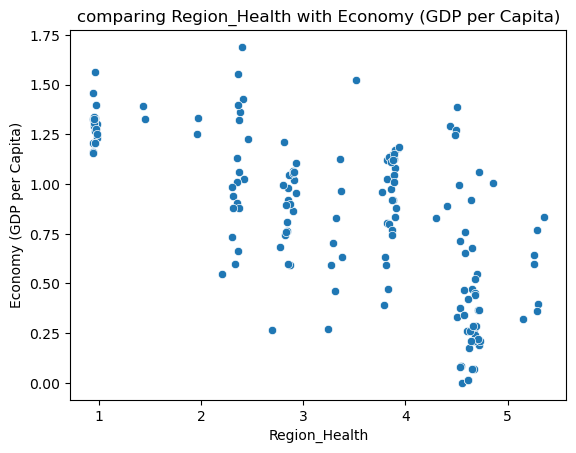

In [549]:
# it seems that the 'Economy (GDP per Capita)'has relations with most of the cols 
# so lets check its relation with other cols
for i in numerical_col:
    plt.title(f'comparing {i} with Economy (GDP per Capita)')
    sns.scatterplot(x = df[i], y = 'Economy (GDP per Capita)', data = df, palette = 'prism')
    plt.show()

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\2008085485.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Happiness Score', data = df, palette = 'bright')


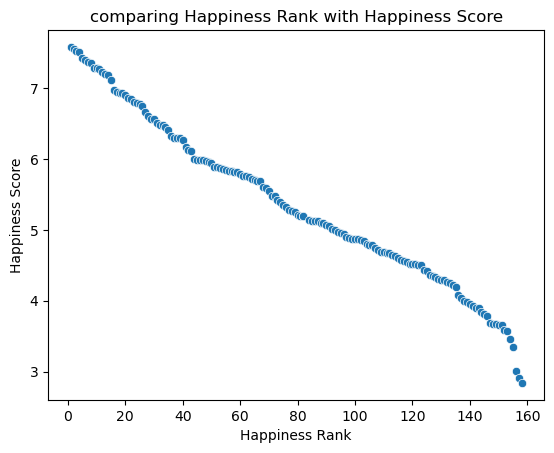

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\2008085485.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Happiness Score', data = df, palette = 'bright')


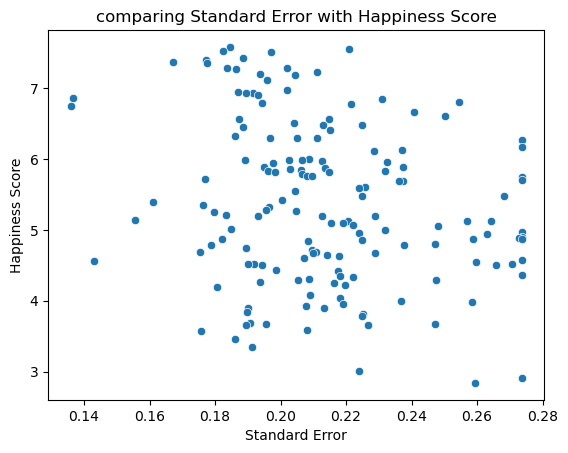

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\2008085485.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Happiness Score', data = df, palette = 'bright')


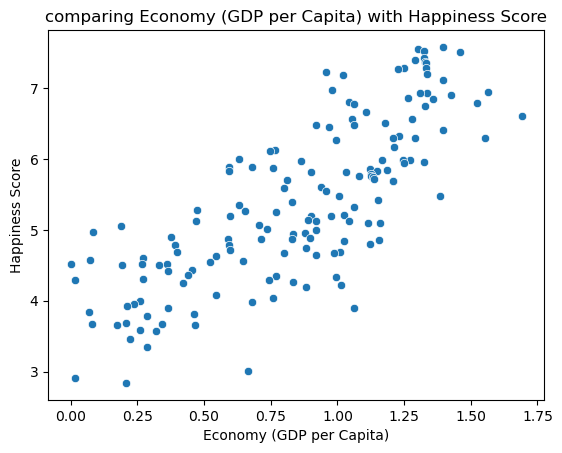

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\2008085485.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Happiness Score', data = df, palette = 'bright')


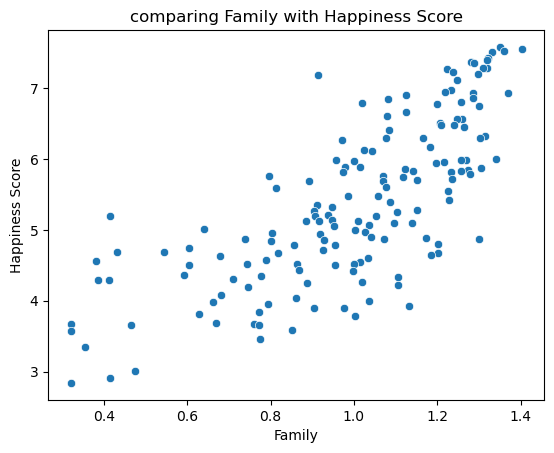

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\2008085485.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Happiness Score', data = df, palette = 'bright')


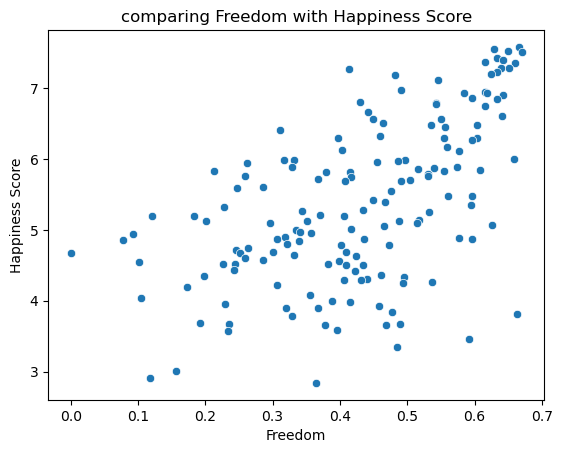

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\2008085485.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Happiness Score', data = df, palette = 'bright')


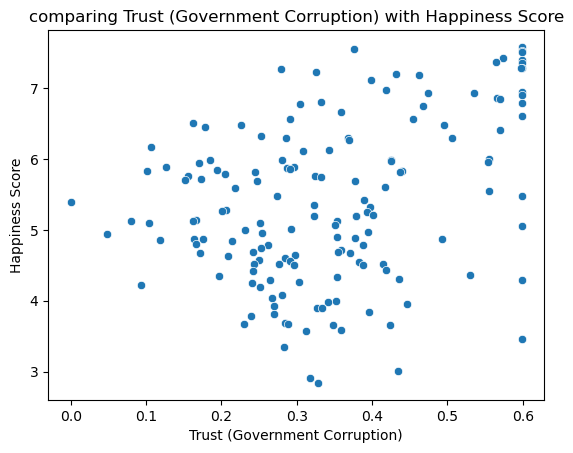

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\2008085485.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Happiness Score', data = df, palette = 'bright')


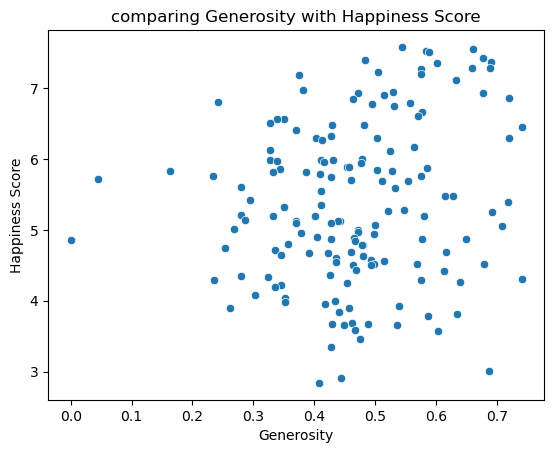

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\2008085485.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Happiness Score', data = df, palette = 'bright')


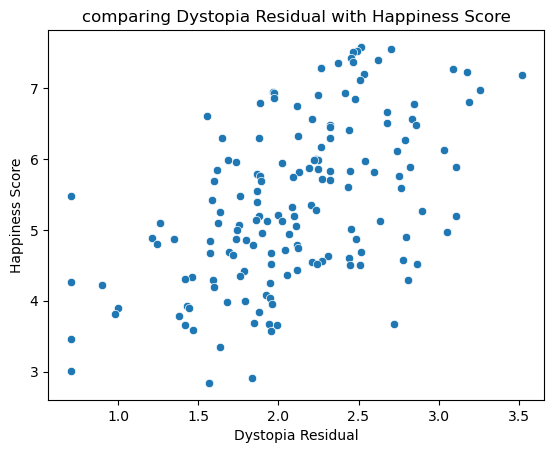

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\2008085485.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Happiness Score', data = df, palette = 'bright')


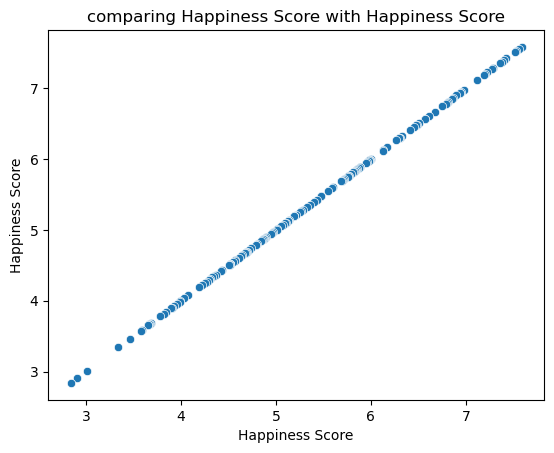

C:\Users\andyt\AppData\Local\Temp\ipykernel_1276\2008085485.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = df[i], y = 'Happiness Score', data = df, palette = 'bright')


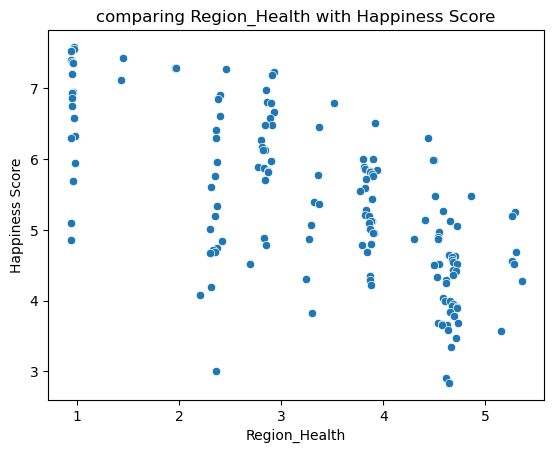

In [527]:
# comparing all the cols with the Target col ie 'Happiness Score' using scatter plot
for i in numerical_col:
    plt.title(f'comparing {i} with Happiness Score')
    sns.scatterplot(x = df[i], y = 'Happiness Score', data = df, palette = 'bright')
    plt.show()

### Below are the correlation of all the cols with a particular col

In [528]:
for i in numerical_col:
    corr8 = df[[f'{i}','Happiness Score']].corr()
    print(corr8)

                 Happiness Rank  Happiness Score
Happiness Rank         1.000000        -0.992105
Happiness Score       -0.992105         1.000000
                 Standard Error  Happiness Score
Standard Error         1.000000        -0.231015
Happiness Score       -0.231015         1.000000
                          Economy (GDP per Capita)  Happiness Score
Economy (GDP per Capita)                  1.000000         0.780966
Happiness Score                           0.780966         1.000000
                   Family  Happiness Score
Family           1.000000         0.746684
Happiness Score  0.746684         1.000000
                  Freedom  Happiness Score
Freedom          1.000000         0.568211
Happiness Score  0.568211         1.000000
                               Trust (Government Corruption)  Happiness Score
Trust (Government Corruption)                       1.000000         0.352646
Happiness Score                                     0.352646         1.000000
          

In [529]:
for i in numerical_col:
    corr9 = df[[f'{i}','Family']].corr()
    print(corr9)

                Happiness Rank   Family
Happiness Rank         1.00000 -0.74152
Family                -0.74152  1.00000
                Standard Error    Family
Standard Error        1.000000 -0.148671
Family               -0.148671  1.000000
                          Economy (GDP per Capita)   Family
Economy (GDP per Capita)                   1.00000  0.64739
Family                                     0.64739  1.00000
        Family  Family
Family     1.0     1.0
Family     1.0     1.0
          Freedom    Family
Freedom  1.000000  0.458894
Family   0.458894  1.000000
                               Trust (Government Corruption)    Family
Trust (Government Corruption)                       1.000000  0.158585
Family                                              0.158585  1.000000
            Generosity    Family
Generosity    1.000000  0.087238
Family        0.087238  1.000000
                   Dystopia Residual    Family
Dystopia Residual           1.000000  0.152568
Family            

In [530]:
for i in numerical_col:
    corr10 = df[[f'{i}','Trust (Government Corruption)']].corr()
    print(corr10)

                               Happiness Rank  Trust (Government Corruption)
Happiness Rank                       1.000000                      -0.331038
Trust (Government Corruption)       -0.331038                       1.000000
                               Standard Error  Trust (Government Corruption)
Standard Error                       1.000000                      -0.145283
Trust (Government Corruption)       -0.145283                       1.000000
                               Economy (GDP per Capita)  \
Economy (GDP per Capita)                       1.000000   
Trust (Government Corruption)                  0.231626   

                               Trust (Government Corruption)  
Economy (GDP per Capita)                            0.231626  
Trust (Government Corruption)                       1.000000  
                                 Family  Trust (Government Corruption)
Family                         1.000000                       0.158585
Trust (Government Corruption)

In [531]:
for i in numerical_col:
    corr11 = df[[f'{i}','Generosity']].corr()
    print(corr11)

                Happiness Rank  Generosity
Happiness Rank        1.000000   -0.161984
Generosity           -0.161984    1.000000
                Standard Error  Generosity
Standard Error        1.000000   -0.078901
Generosity           -0.078901    1.000000
                          Economy (GDP per Capita)  Generosity
Economy (GDP per Capita)                   1.00000    -0.03377
Generosity                                -0.03377     1.00000
              Family  Generosity
Family      1.000000    0.087238
Generosity  0.087238    1.000000
             Freedom  Generosity
Freedom     1.000000    0.403055
Generosity  0.403055    1.000000
                               Trust (Government Corruption)  Generosity
Trust (Government Corruption)                       1.000000    0.275698
Generosity                                          0.275698    1.000000
            Generosity  Generosity
Generosity         1.0         1.0
Generosity         1.0         1.0
                   Dystopia Res

In [532]:
for i in numerical_col:
    corr12 = df[[f'{i}','Standard Error']].corr()
    print(corr12)

                Happiness Rank  Standard Error
Happiness Rank        1.000000        0.211505
Standard Error        0.211505        1.000000
                Standard Error  Standard Error
Standard Error             1.0             1.0
Standard Error             1.0             1.0
                          Economy (GDP per Capita)  Standard Error
Economy (GDP per Capita)                  1.000000       -0.232552
Standard Error                           -0.232552        1.000000
                  Family  Standard Error
Family          1.000000       -0.148671
Standard Error -0.148671        1.000000
                 Freedom  Standard Error
Freedom         1.000000       -0.181992
Standard Error -0.181992        1.000000
                               Trust (Government Corruption)  Standard Error
Trust (Government Corruption)                       1.000000       -0.145283
Standard Error                                     -0.145283        1.000000
                Generosity  Standard Err

### Multivariate Analysis

C:\Users\andyt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


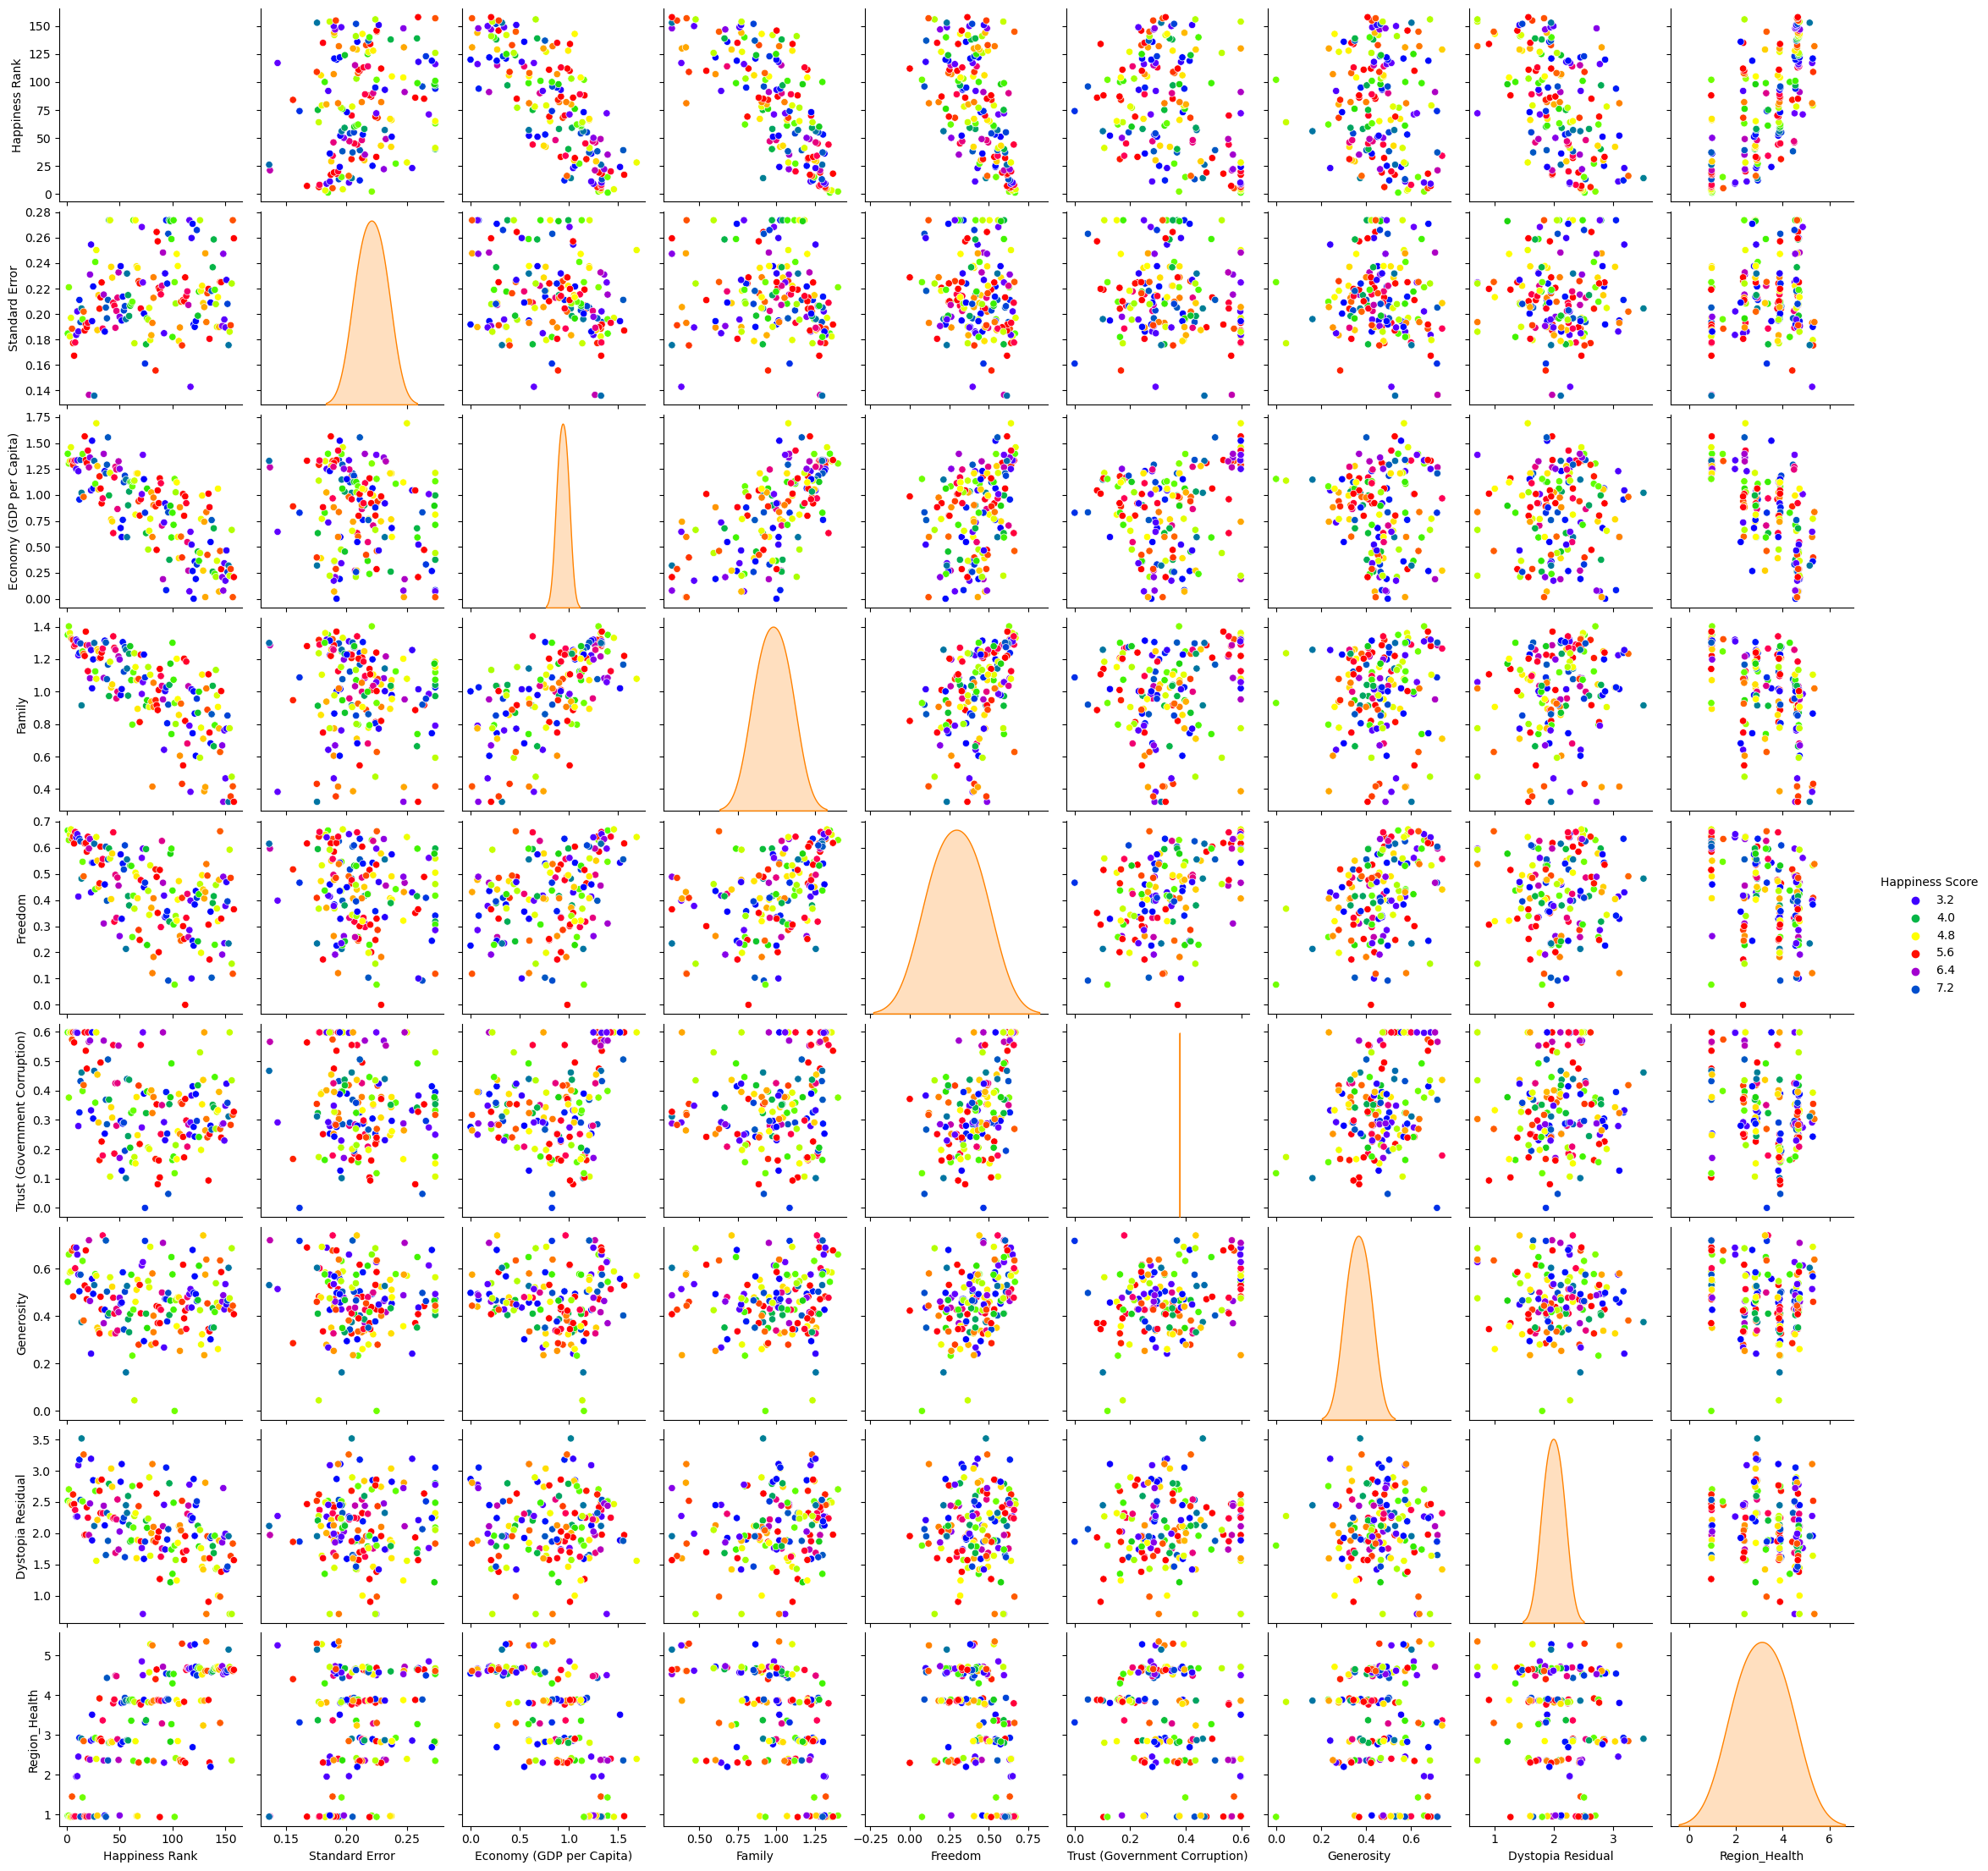

In [533]:
# Comparing all the cols with each other using pairplot
sns.pairplot(df, hue = 'Happiness Score', palette = 'prism')
plt.show()

In [535]:
# Changing the indexing of our target col ie Happiness score
if 'Happiness Score' in df.columns:
    Happiness_score = df.pop('Happiness Score')
    df['Happiness Score'] = Happiness_score
else:
    print("Col 'Happiness Score' does not exist in df")

In [536]:
df

Happiness Rank  Standard Error  Economy (GDP per Capita)    Family  \
0                 1        0.184689                   1.39651  1.349510   
1                 2        0.220998                   1.30232  1.402230   
2                 3        0.182428                   1.32548  1.360580   
3                 4        0.196977                   1.45900  1.330950   
4                 5        0.188494                   1.32629  1.322610   
..              ...             ...                       ...       ...   
153             154        0.186118                   0.22208  0.773700   
154             155        0.191207                   0.28665  0.353860   
155             156        0.223942                   0.66320  0.474890   
156             157        0.273585                   0.01530  0.415870   
157             158        0.259365                   0.20868  0.320449   

     Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual  \
0    0.66557                       0.598435    0.544775           2.517380   
1    0.62877                       0.376098    0.660530           2.702010   
2    0.64938                       0.598435    0.584286           2.492040   
3    0.66973                       0.598435    0.589059           2.465310   
4    0.63297                       0.574082    0.676838           2.451760   
..       ...                            ...         ...                ...   
153  0.59201                       0.598435    0.475689           0.704902   
154  0.48450                       0.283019    0.427317           1.633280   
155  0.15684                       0.434810    0.686870           0.704902   
156  0.11850                       0.317207    0.444151           1.833020   
157  0.36453                       0.327582    0.408424           1.567260   

     Region_Health  Happiness Score  
0         0.970715            7.587  
1         0.973920            7.561  
2         0.937320            7.527  
3         0.942605            7.522  
4         1.452815            7.427  
..             ...              ...  
153       4.714320            3.465  
154       4.659550            3.340  
155       2.360965            3.006  
156       4.611980            2.905  
157       4.642215            2.839  

[158 rows x 10 columns]

## Model Building 

In [537]:
# creating the x variable for storing the input data part
x = df.iloc[:,:-1]
x.head(2)

Happiness Rank  Standard Error  Economy (GDP per Capita)   Family  Freedom  \
0               1        0.184689                   1.39651  1.34951  0.66557   
1               2        0.220998                   1.30232  1.40223  0.62877   

   Trust (Government Corruption)  Generosity  Dystopia Residual  Region_Health  
0                       0.598435    0.544775            2.51738       0.970715  
1                       0.376098    0.660530            2.70201       0.973920

In [538]:
# creating the y variable for storing the output data part
y = df.iloc[:,-1:]
y.head()

Happiness Score
0            7.587
1            7.561
2            7.527
3            7.522
4            7.427

In [539]:
# checking the shape of x and y
print(x.shape)
print(y.shape)

(158, 9)
(158, 1)


In [540]:
# splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state = 42)

In [541]:
# checking the shape of x_train and x_test
print(x_train.shape)
print(x_test.shape)

(110, 9)
(48, 9)


In [542]:
# checking the shape of y_train and y_test
print(y_train.shape)
print(y_test.shape)

(110, 1)
(48, 1)


### Trying the Linear Regression classifier

In [543]:
# creating instance lr for the Linear Regression
lr = LinearRegression()
lr

LinearRegression()

In [544]:
# applying fit method on x_train and y_train
lr.fit(x_train, y_train)

LinearRegression()

In [545]:
# checking the Coefficient values of these values are added or subtracted from the y variable as per their sign
lr.coef_

array([[-0.01367102, -1.19610409,  0.59814387,  0.48168918,  0.51109653,
         0.365476  ,  0.47811225,  0.4632896 , -0.0255832 ]])

In [546]:
# checking the Intercept values
lr.intercept_

array([4.27721227])

In [547]:
lr.score(x_train, y_train)

0.9921308643000295

In [550]:
pred = lr.predict(x_test)
print('Predicted result Happiness Score: ', pred)
print('Actual Happiness Score: ', y_test)

Predicted result Happiness Score:  [[4.08052317]
 [6.01828622]
 [4.12571508]
 [3.13317842]
 [4.96022494]
 [6.57958628]
 [5.01539384]
 [4.83954352]
 [4.75007082]
 [3.90500931]
 [6.94089094]
 [5.82519416]
 [7.02142357]
 [5.65318591]
 [6.75404481]
 [6.48857482]
 [4.52203777]
 [4.64873969]
 [5.05025693]
 [5.67843687]
 [3.73995385]
 [6.98451321]
 [7.19393999]
 [7.19344822]
 [6.52351145]
 [5.26479103]
 [5.9528872 ]
 [3.89338325]
 [4.23911661]
 [3.64541712]
 [3.72140382]
 [5.42810101]
 [4.009372  ]
 [5.82748956]
 [4.13731346]
 [5.21334307]
 [3.46425419]
 [6.22120436]
 [5.65830424]
 [4.45720092]
 [6.62149462]
 [4.11554648]
 [5.34537178]
 [3.70861289]
 [6.40236881]
 [5.32477799]
 [6.74975521]
 [3.99382011]]
Actual Happiness Score:       Happiness Score
128            4.307
45             5.987
134            4.194
156            2.905
90             5.057
29             6.574
96             4.898
98             4.876
95             4.949
140            3.931
19             6.901
56             

In [553]:
# checking the errors by metrics MSE, MAE, RMSE
print('error')

print('Mean Squared Error: ', mean_squared_error(y_test, pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, pred))

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))

error
Mean Squared Error:  0.009079722612515296
Mean Absolute Error:  0.0748186116048658
Root Mean Squared Error:  0.09528757847964915


In [555]:
# calculating r2 score 
print(r2_score(y_test, pred))

0.9931792176198233


In [556]:
df

Happiness Rank  Standard Error  Economy (GDP per Capita)    Family  \
0                 1        0.184689                   1.39651  1.349510   
1                 2        0.220998                   1.30232  1.402230   
2                 3        0.182428                   1.32548  1.360580   
3                 4        0.196977                   1.45900  1.330950   
4                 5        0.188494                   1.32629  1.322610   
..              ...             ...                       ...       ...   
153             154        0.186118                   0.22208  0.773700   
154             155        0.191207                   0.28665  0.353860   
155             156        0.223942                   0.66320  0.474890   
156             157        0.273585                   0.01530  0.415870   
157             158        0.259365                   0.20868  0.320449   

     Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual  \
0    0.66557                       0.598435    0.544775           2.517380   
1    0.62877                       0.376098    0.660530           2.702010   
2    0.64938                       0.598435    0.584286           2.492040   
3    0.66973                       0.598435    0.589059           2.465310   
4    0.63297                       0.574082    0.676838           2.451760   
..       ...                            ...         ...                ...   
153  0.59201                       0.598435    0.475689           0.704902   
154  0.48450                       0.283019    0.427317           1.633280   
155  0.15684                       0.434810    0.686870           0.704902   
156  0.11850                       0.317207    0.444151           1.833020   
157  0.36453                       0.327582    0.408424           1.567260   

     Region_Health  Happiness Score  
0         0.970715            7.587  
1         0.973920            7.561  
2         0.937320            7.527  
3         0.942605            7.522  
4         1.452815            7.427  
..             ...              ...  
153       4.714320            3.465  
154       4.659550            3.340  
155       2.360965            3.006  
156       4.611980            2.905  
157       4.642215            2.839  

[158 rows x 10 columns]

In [557]:
t = np.array([154,0.186118,0.22208,0.773700,0.59201,0.598435,0.475689,0.704902,4.714320])

In [558]:
t.shape

(9,)

In [559]:
t = t.reshape(1, -1)
t.shape

(1, 9)

In [560]:
lr.predict(t)

C:\Users\andyt\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.40946494]])